In [1]:
#!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from torchvision.utils import save_image
from torchmetrics.regression import PearsonCorrCoef
from eofs.standard import Eof
from torch import nn


In [2]:
#!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from torchvision.utils import save_image
from torchmetrics.regression import PearsonCorrCoef
from eofs.standard import Eof
from torch import nn
def plot_map(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    #levels = np.linspace(0.0,1.0,21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='seismic')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name,dpi=300,bbox_inches='tight')
    


    plt.show()
    plt.clf()

#!pip install basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
def plot_map_metric(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    #levels = np.linspace(0.0,1.0,21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='Spectral')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name,dpi=300,bbox_inches='tight')
    


    plt.show()
    plt.clf()



def EOF(Data, lat, lon):
    wgts   = np.cos(np.deg2rad(lat))
    wgts   = wgts.reshape(len(wgts), 1)
    #solver1 = Eof(np.array(ser_original[6]), weights=wgts)

    coslat = np.cos(np.deg2rad(lat))
    wgts = np.sqrt(coslat)[..., np.newaxis]
    solver =Eof(Data,weights=wgts)
    eof1=solver.eofs()

    pc=solver.pcs(pcscaling=1)
    varfrac=solver.varianceFraction()
    lambdas=solver.eigenvalues()


    parallels = np.arange(-90,90,20)
    meridians = np.arange(-180,180,40)

    fig=plt.figure(figsize=(10,16)) 

    m=Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
            urcrnrlon=max(lon), urcrnrlat=max(lat), resolution='l')
    x, y = m(*np.meshgrid(lon,lat))
    clevs = np.linspace(-0.1,0.1,11)

    cs = m.contourf(x,y,eof1[0,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
    m.drawcoastlines()
    m.fillcontinents(color='#000000',lake_color='#99ffff')
    m.drawparallels(parallels,labels=[1,0,0,0])
    m.drawmeridians(meridians,labels=[1,0,0,1])

    cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
    #cb.set_label('EOF', fontsize=10)
    plt.title('EOF1', fontsize=15)  
    plt.show()
    
    fig=plt.figure(figsize=(10,16))
    plt.subplot(212)
    #days = pd.date_range('1871-01-01', '2011-01-01', freq='ME')
    plt.plot( pc[:,0], linewidth=2)
    plt.axhline(0, color='k')
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')   
    #plt.savefig('../Data/output/MIROC_Observed/EOF/PC_Amplitude_gen_extend_'+str(i)+'.png')
    plt.show()
    


In [3]:
import xarray as xr
vae_anom_ds=xr.open_dataset('../Data/output/GISS/Conv_VAE_output_GISS_anomaly.nc')#('../Data/output/GISS/gen_anom.nc')
diffusion_anom_ds=xr.open_dataset('../Data/output/GISS/Diffusion_output_GISS_anomaly.nc')
gan_anom_ds=xr.open_dataset('../Data/output/GISS/gen_anom.nc')
ori_anom_ds=xr.open_dataset('../Data/output/GISS/giss_anom.nc')
obs_anom_ds=xr.open_dataset('../Data/output/GISS/cobe_anom.nc')


# lat_sst=vae_anom_ds.lat.values
# lon_sst=vae_anom_ds.lon.values


# import xarray as xr
# vae_anom_ds=xr.open_dataset('../Data/output/MIROC6/gen_anom.nc')
# gen_finetune_anom_ds=xr.open_dataset('../Data/output/MIROC_COBE/gen_anom.nc')
# ori_anom_ds=xr.open_dataset('../Data/output/MIROC6/miroc6_anom.nc')
# obs_anom_ds=xr.open_dataset('../Data/output/MIROC_COBE/cobe_anom.nc')


# lat_sst=vae_anom_ds.lat.values
# lon_sst=gen_anom_ds.lon.values

# import xarray as xr
# gen_anom_ds=xr.open_dataset('../Data/output/GENERATED_FINAL/EC_Earth/Without_Fine_Tune/gen_anom_reshape.nc',decode_times=False)
# gan_anom_ds=xr.open_dataset('../Data/output/GENERATED_FINAL/EC_Earth/gen_anom_reshape.nc',decode_times=False)
# ori_anom_ds=xr.open_dataset('../Data/output/EC_Earth3_CC/ori_anom.nc')
# obs_anom_ds=xr.open_dataset('../Data/output/MIROC6/cobe_anom.nc')


lat_sst=vae_anom_ds.lat.values
lon_sst=vae_anom_ds.lon.values

In [4]:
import xarray as xr
from scipy.stats import pearsonr

def plot_map(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    #levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    levels = np.linspace(0.0,0.5,11)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='Spectral')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name,dpi=300,bbox_inches='tight')
    


    plt.show()
    plt.clf()



def compute_spatial_pearson_correlation(gen_anom, ori_anom, obs_anom):
    gen_flat = gen_anom.flatten()
    ori_flat = ori_anom.flatten()
    obs_flat = obs_anom.flatten()

    # Compute Pearson correlation coefficients
    corr_gen_ori = pearsonr(gen_flat, ori_flat)[0]
    corr_gen_obs = pearsonr(gen_flat, obs_flat)[0]
    corr_ori_obs = pearsonr(ori_flat, obs_flat)[0]

    return corr_gen_ori, corr_gen_obs, corr_ori_obs


def compute_temporally_pearson_correlation(gen_anom, ori_anom, obs_anom):
    
    
    corr_map_gen_obs = np.zeros((gen_anom.shape[1], gen_anom.shape[2]))
    corr_map_ori_obs = np.zeros((gen_anom.shape[1], gen_anom.shape[2]))
    corr_map_gen_ori = np.zeros((gen_anom.shape[1], gen_anom.shape[2]))

    for i in range(gen_anom.shape[1]):
        for j in range(gen_anom.shape[2]):
            corr_map_gen_obs[i,j] = 0 if pearsonr(gen_anom[:,i,j], obs_anom[:,i,j])[0]<0 else pearsonr(gen_anom[:,i,j], obs_anom[:,i,j])[0]
            corr_map_ori_obs[i,j] = 0 if pearsonr(ori_anom[:,i,j], obs_anom[:,i,j])[0]<0 else pearsonr(ori_anom[:,i,j], obs_anom[:,i,j])[0]
            corr_map_gen_ori[i,j] = 0 if pearsonr(gen_anom[:,i,j], ori_anom[:,i,j])[0]<0 else pearsonr(gen_anom[:,i,j], ori_anom[:,i,j])[0]

    return corr_map_gen_obs, corr_map_ori_obs, corr_map_gen_ori

# gen_anom_ds=xr.open_dataset('../Data/output/GISS/gen_anom.nc')
# gan_anom_ds=xr.open_dataset('../Data/output/GISS_COBE/gen_anom.nc')
# ori_anom_ds=xr.open_dataset('../Data/output/GISS/giss_anom.nc')
# obs_anom_ds=xr.open_dataset('../Data/output/EC_COBE/cobe_anom.nc')

# gen_ds=xr.open_dataset('../Data/output/GISS/gen.nc')
# ori_ds=xr.open_dataset('../Data/output/GISS/giss.nc')
# obs_ds=xr.open_dataset('../Data/output/GISS_COBE/cobe.nc')

full_vae_ds = vae_anom_ds#+gen_ds.mean(dim='years')
full_gan_ds = gan_anom_ds#+gen_ds.mean(dim='years')
full_diffusion_ds = diffusion_anom_ds#+gen_ds.mean(dim='years')
full_ori_ds = ori_anom_ds#+ori_ds.mean(dim='years')
full_obs_ds = obs_anom_ds#+obs_ds.mean(dim='years')

full_vae_ds_3mo_avg = full_vae_ds.rolling(time=3, center=True).mean().fillna(0)
full_gan_ds_3mo_avg = full_gan_ds.rolling(time=3, center=True).mean().fillna(0)
full_diffusion_ds_3mo_avg = full_diffusion_ds.rolling(time=3, center=True).mean().fillna(0)
full_ori_ds_3mo_avg = full_ori_ds.rolling(time=3, center=True).mean().fillna(0)
full_obs_ds_3mo_avg = full_obs_ds.rolling(time=3, center=True).mean().fillna(0)

print('VAE')
print(compute_spatial_pearson_correlation(full_vae_ds_3mo_avg.sst.values.reshape(12000,48,144)[:1980],
                                           full_ori_ds_3mo_avg.sst.values.reshape(1980,48,144),
                                             full_obs_ds_3mo_avg.sst.values.reshape(2088,48,144)[:1980]))



corr_map_vae_obs,corr_map_ori_obs,corr_map_vae_ori=compute_temporally_pearson_correlation(full_vae_ds_3mo_avg.sst.values.reshape(12000,48,144)[:1980],
                                           full_ori_ds_3mo_avg.sst.values.reshape(1980,48,144),
                                             full_obs_ds_3mo_avg.sst.values.reshape(2088,48,144)[:1980])

print(np.nanmean(corr_map_vae_obs),np.nanmean(corr_map_ori_obs),np.nanmean(corr_map_vae_ori))
plot_map(lon_sst,lat_sst,corr_map_vae_obs,'../Data/output/GISS/corr_map_vae_obs.png')
plot_map(lon_sst,lat_sst,corr_map_ori_obs,'../Data/output/GISS/corr_map_ori_obs.png')
plot_map(lon_sst,lat_sst,corr_map_vae_ori,'../Data/output/GISS/corr_map_vae_ori.png')


print('GAN')
print(compute_spatial_pearson_correlation(full_gan_ds_3mo_avg.sst.values.reshape(12000,48,144)[:1980],
                                           full_ori_ds_3mo_avg.sst.values.reshape(1980,48,144),
                                             full_obs_ds_3mo_avg.sst.values.reshape(2088,48,144)[:1980]))



corr_map_gan_obs,corr_map_ori_obs,corr_map_gan_ori=compute_temporally_pearson_correlation(full_gan_ds_3mo_avg.sst.values.reshape(12000,48,144)[:1980],
                                           full_ori_ds_3mo_avg.sst.values.reshape(1980,48,144),
                                             full_obs_ds_3mo_avg.sst.values.reshape(2088,48,144)[:1980])

print(np.nanmean(corr_map_gan_obs),np.nanmean(corr_map_ori_obs),np.nanmean(corr_map_gan_ori))
plot_map(lon_sst,lat_sst,corr_map_gan_obs,'../Data/output/GISS/corr_map_gan_obs.png')
plot_map(lon_sst,lat_sst,corr_map_ori_obs,'../Data/output/GISS/corr_map_gan_ori.png')

print('Diffusion')

print(compute_spatial_pearson_correlation(full_diffusion_ds_3mo_avg.sst.values.reshape(12000,48,144)[:1980],
                                           full_ori_ds_3mo_avg.sst.values.reshape(1980,48,144),
                                             full_obs_ds_3mo_avg.sst.values.reshape(2088,48,144)[:1980]))



corr_map_diffusion_obs,corr_map_ori_obs,corr_map_diffusion_ori=compute_temporally_pearson_correlation(full_diffusion_ds_3mo_avg.sst.values.reshape(12000,48,144)[:1980],
                                           full_ori_ds_3mo_avg.sst.values.reshape(1980,48,144),
                                             full_obs_ds_3mo_avg.sst.values.reshape(2088,48,144)[:1980])

print(np.nanmean(corr_map_diffusion_obs),np.nanmean(corr_map_ori_obs),np.nanmean(corr_map_diffusion_ori))
plot_map(lon_sst,lat_sst,corr_map_diffusion_obs,'../Data/output/GISS/corr_map_diffusion_obs.png')
plot_map(lon_sst,lat_sst,corr_map_diffusion_ori,'../Data/output/GISS/corr_map_diffusion_ori.png')


KeyError: "Window dimensions ('time',) not found in Dataset dimensions ('years', 'mon', 'lat', 'lon')"

mean generated


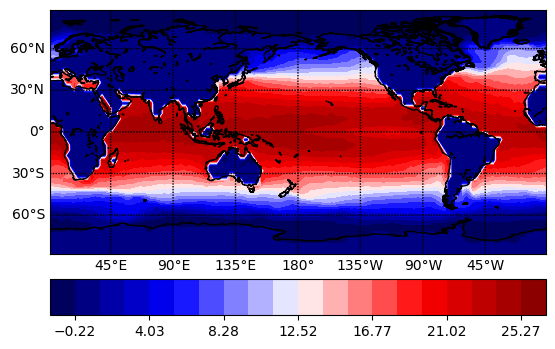

mean generated ft


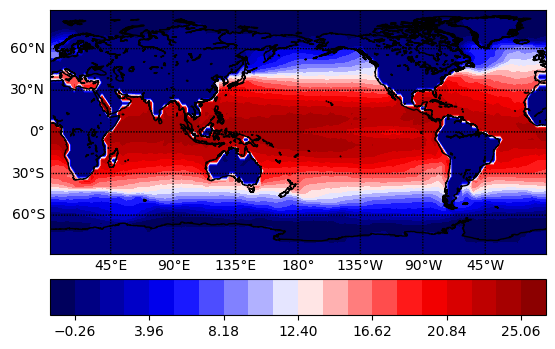

mean CMIP6


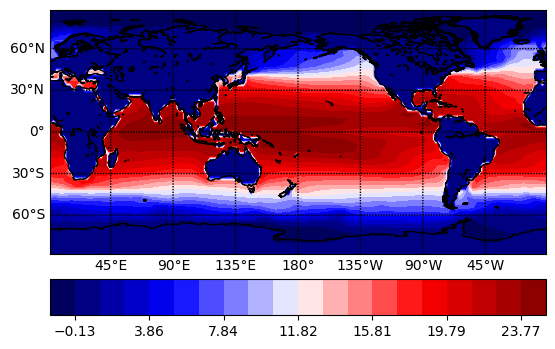

mean observed


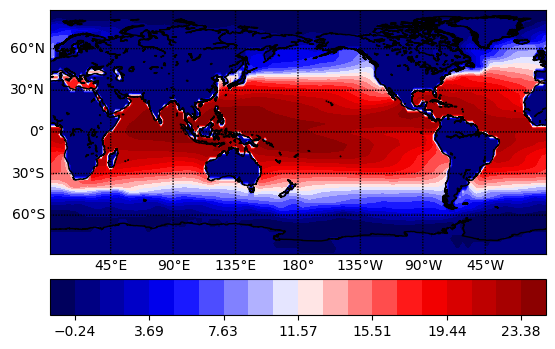

<Figure size 640x480 with 0 Axes>

In [ ]:
# gen_anom_ds=xr.open_dataset('../Data/output/EC_Earth3_CC/gen_anom.nc')
# gan_anom_ds=xr.open_dataset('../Data/output/EC_COBE/gen_anom.nc')
# ori_anom_ds=xr.open_dataset('../Data/output/EC_Earth3_CC/ori_anom.nc')
# obs_anom_ds=xr.open_dataset('../Data/output/EC_COBE/cobe_anom.nc')

# gen_ds=xr.open_dataset('../Data/output/GISS/gen.nc')
# ori_ds=xr.open_dataset('../Data/output/EC_Earth3_CC/ori.nc')
# obs_ds=xr.open_dataset('../Data/output/GISS_COBE/cobe.nc')

# full_gen_ds = gen_anom_ds+gen_ds.mean(dim='years')
# full_gen_ft_ds = gan_anom_ds+gen_ds.mean(dim='years')
# full_ori_ds = ori_anom_ds+ori_ds.mean(dim='years')
# full_obs_ds = obs_anom_ds+obs_ds.mean(dim='years')

# full_gen_ds_3mo_avg = full_gen_ds.rolling(mon=3, center=True).mean().fillna(0)
# full_ori_ds_3mo_avg = full_ori_ds.rolling(mon=3, center=True).mean().fillna(0)
# full_obs_ds_3mo_avg = full_obs_ds.rolling(mon=3, center=True).mean().fillna(0)
# full_gen_ft_3mo_avg = full_gen_ft_ds.rolling(mon=3, center=True).mean().fillna(0)



# print('mean generated')
# plot_map(lon_sst,lat_sst,full_gen_ds_3mo_avg.mean(('years','mon')).sst.values,'../Data/output/EC_Earth3_CC/mean_gen.png')
# print('mean generated ft')
# plot_map(lon_sst,lat_sst,full_gen_ft_3mo_avg.mean(('years','mon')).sst.values,'../Data/output/EC_Earth3_CC/mean_gen_ft.png')
# print('mean CMIP6')
# plot_map(lon_sst,lat_sst,full_ori_ds_3mo_avg.mean(('years','mon')).sst.values,'../Data/output/EC_Earth3_CC/mean_ori.png')
# print('mean observed')
# plot_map(lon_sst,lat_sst,full_obs_ds_3mo_avg.mean(('years','mon')).sst.values,'../Data/output/EC_Earth3_CC/mean_obs.png')

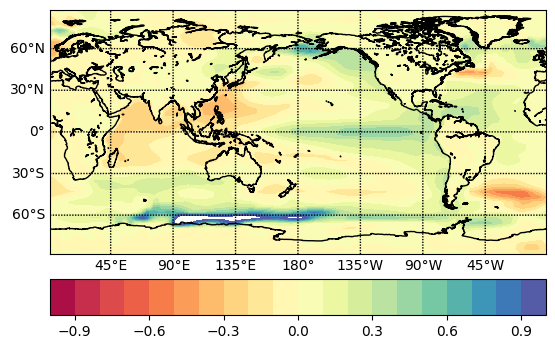

mean bias vae-observed = 0.1072145553403194


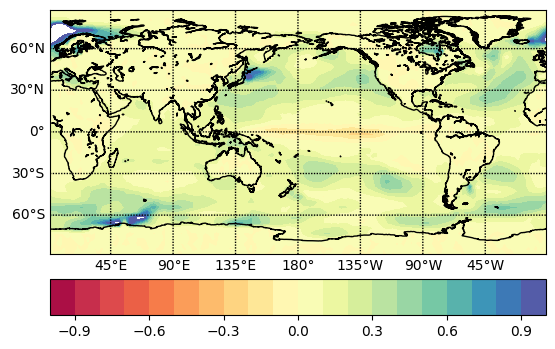

mean bias gan-observed = 0.1201728191758537


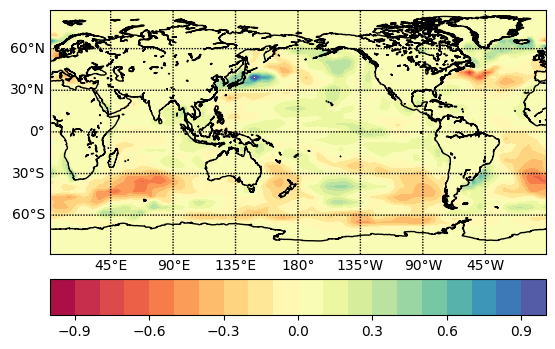

mean bias diffusion-observed = 0.08633413833256622


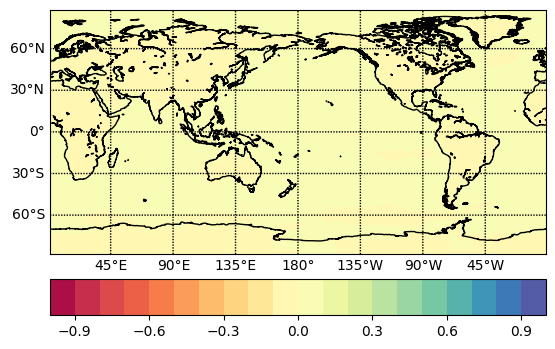

mean bias original-observed = 0.009080906727534114


<Figure size 640x480 with 0 Axes>

In [14]:
import xarray as xr

def plot_map_metric(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    levels = np.linspace(-1.0,1.0,21)
    #levels = np.linspace(-0.7,1.0,21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='Spectral')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name,dpi=300,bbox_inches='tight')
    


    plt.show()
    plt.clf()



def calculate_mean_bias(time_series_1, time_series_2):
    """
    Calculates the mean bias between two time series data.

    Args:
      time_series_1: A numpy array or list representing the first time series.
      time_series_2: A numpy array or list representing the second time series.

    Returns:
      The mean bias between the two time series.
    """
    differences = np.array(time_series_1) - np.array(time_series_2)
    mean_bias = np.mean(differences)
    return mean_bias



# gen_anom_ds=xr.open_dataset('../Data/output/GENERATED_FINAL/GISS/Without_Fine_Tune/gen_anom_reshape.nc',decode_times=False)
# gan_anom_ds=xr.open_dataset('../Data/output/GENERATED_FINAL/GISS/gen_anom_reshape.nc',decode_times=False)
# ori_anom_ds=xr.open_dataset('../Data/output/GISS/giss_anom.nc')
# obs_anom_ds=xr.open_dataset('../Data/output/MIROC6/cobe_anom.nc')

lat_sst=vae_anom_ds.lat.values
lon_sst=vae_anom_ds.lon.values

_,lat_size,lon_size = vae_anom_ds.sst.values.reshape(12000,48,144)[:2088].shape

bias_map = np.zeros((lat_size, lon_size))

for i in range(lat_size):
    for j in range(lon_size):
        bias_map[i, j] = calculate_mean_bias(vae_anom_ds.sst.values.reshape(12000,48,144)[:2088,i,j],
                                             obs_anom_ds.sst.values.reshape(2088,48,144)[:2088,i,j])
plot_map_metric(lon_sst, lat_sst, bias_map, '../Data/output/GISS/bias_map_vae_obs_anomaly.png')

print('mean bias vae-observed = '+str(np.nanmean(abs(bias_map))))

bias_map = np.zeros((lat_size, lon_size))
for i in range(lat_size):
    for j in range(lon_size):
        bias_map[i, j] = calculate_mean_bias(gan_anom_ds.sst.values.reshape(12000,48,144)[:2088,i,j],
                                             obs_anom_ds.sst.values.reshape(2088,48,144)[:2088,i,j])
plot_map_metric(lon_sst, lat_sst, bias_map, '../Data/output/GISS/bias_map_gan_obs_anomaly.png')


print('mean bias gan-observed = '+str(np.nanmean(abs(bias_map))))


bias_map = np.zeros((lat_size, lon_size))
for i in range(lat_size):
    for j in range(lon_size):
        bias_map[i, j] = calculate_mean_bias(diffusion_anom_ds.sst.values.reshape(12000,48,144)[:2088,i,j],
                                             obs_anom_ds.sst.values.reshape(2088,48,144)[:2088,i,j])
plot_map_metric(lon_sst, lat_sst, bias_map, '../Data/output/GISS/bias_map_diffusion_obs_anomaly.png')


print('mean bias diffusion-observed = '+str(np.nanmean(abs(bias_map))))

bias_map = np.zeros((lat_size, lon_size))
for i in range(lat_size):
    for j in range(lon_size):
        bias_map[i, j] = calculate_mean_bias(ori_anom_ds.sst.values.reshape(1980,48,144)[:1980,i,j],
                                             obs_anom_ds.sst.values.reshape(2088,48,144)[:1980,i,j])
plot_map_metric(lon_sst, lat_sst, bias_map, '../Data/output/GISS/bias_map_ori_obs_anomaly.png')


print('mean bias original-observed = '+str(np.nanmean(abs(bias_map))))

In [15]:

ori_anom_ds=xr.Dataset(
    data_vars={
        "sst": (("time","lat","lon"),ori_anom_ds.sst.values.reshape(1980,48,144))
    },
    coords={
        
        "time": range(1980),
        
        "lat": ori_anom_ds.lat.values,
        "lon": ori_anom_ds.lon.values
    }
)


obs_anom_ds=xr.Dataset(
    data_vars={
        "sst": (("time","lat","lon"),obs_anom_ds.sst.values.reshape(2088,48,144))
    },
    coords={
        
        "time": range(2088),
        
        "lat": obs_anom_ds.lat.values,
        "lon": obs_anom_ds.lon.values
    }
)

gan_anom_ds=xr.Dataset(
    data_vars={
        "sst": (("time","lat","lon"),gan_anom_ds.sst.values.reshape(12000,48,144))
    },
    coords={
        
        "time": range(12000),
        
        "lat": obs_anom_ds.lat.values,
        "lon": obs_anom_ds.lon.values
    }
)

In [13]:
gan_anom_ds

<xarray.Dataset> Size: 332MB
Dimensions:  (time: 12000, lat: 48, lon: 144)
Coordinates:
  * time     (time) int64 96kB 0 1 2 3 4 5 ... 11995 11996 11997 11998 11999
  * lat      (lat) float64 384B -88.12 -84.38 -80.62 ... 80.62 84.38 88.12
  * lon      (lon) float64 1kB 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Data variables:
    sst      (time, lat, lon) float32 332MB -0.003401 0.00378 ... 0.03756

# Mean

vae


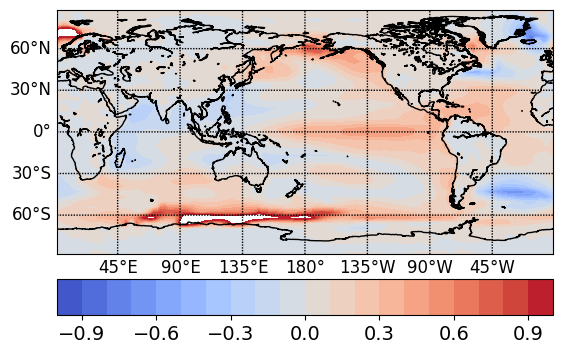

GAN


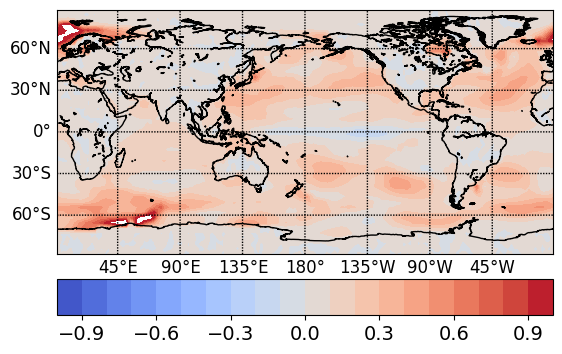

Diffusion


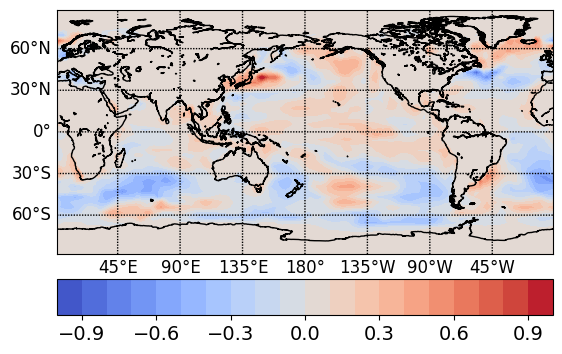

CMIP


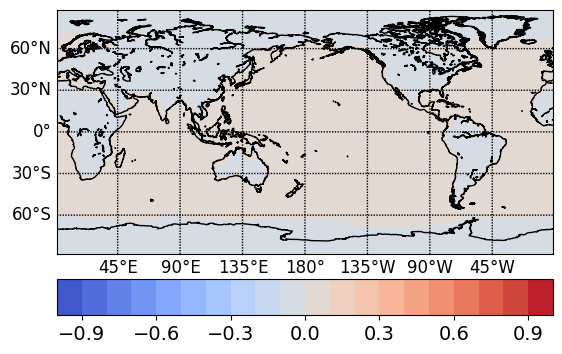

COBE


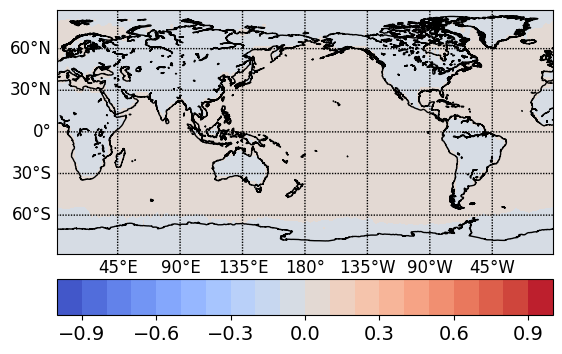

<Figure size 640x480 with 0 Axes>

In [16]:

def plot_map(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    levels = np.linspace(-1.0,1.0,21)
    #levels = np.linspace(0.0,2.0,5)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='coolwarm')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    cb.ax.tick_params(labelsize=14)  # Increase font size of colorbar ticks
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0], fontsize=12)
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1], fontsize=12)
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name,dpi=300,bbox_inches='tight')
    


    plt.show()
    plt.clf()

print('vae')
plot_map(lon_sst,lat_sst,vae_anom_ds.mean(dim='time')['sst'].values,'../Data/output/GISS/vae_anomaly_mean.png')

print('GAN')
plot_map(lon_sst,lat_sst,gan_anom_ds.mean(dim='time')['sst'].values,'../Data/output/GISS/gan_anomaly_mean.png')

print('Diffusion')
plot_map(lon_sst,lat_sst,diffusion_anom_ds.mean(dim='time')['sst'].values,'../Data/output/GISS/diffusion_anomaly_mean.png')

print('CMIP')
plot_map(lon_sst,lat_sst,ori_anom_ds.mean(dim='time')['sst'].values,'../Data/output/GISS/ori_anomaly_mean.png')


print('COBE')
plot_map(lon_sst,lat_sst,obs_anom_ds.mean(dim='time')['sst'].values,'../Data/output/GISS/obs_anomaly_mean.png')

# Standard Deviation (Figure 6)

VAE


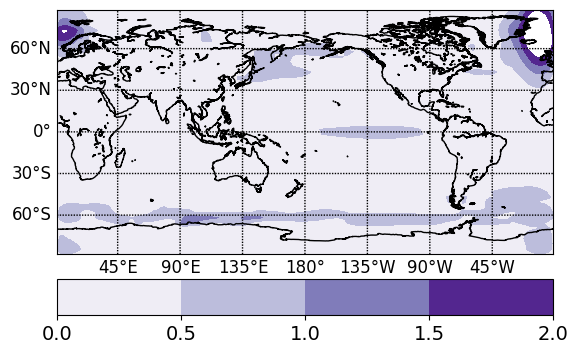

GAN


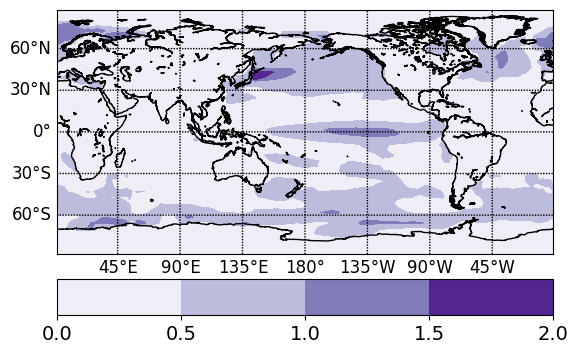

Diffusion


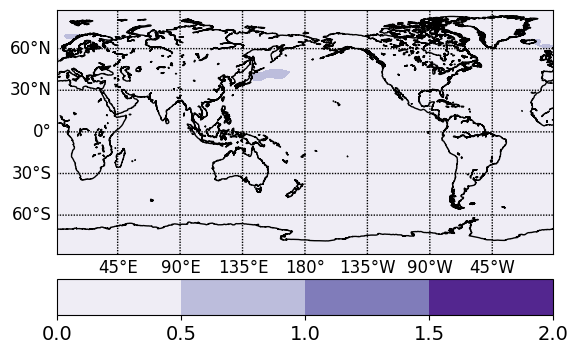

CMIP6


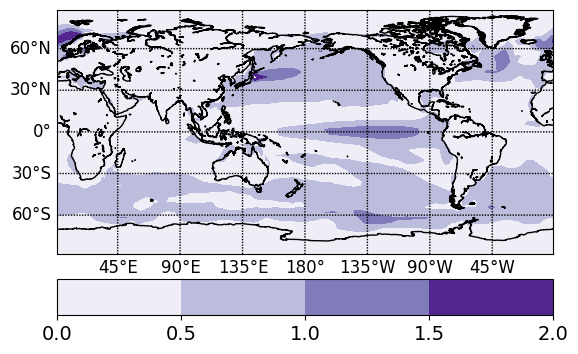

COBE


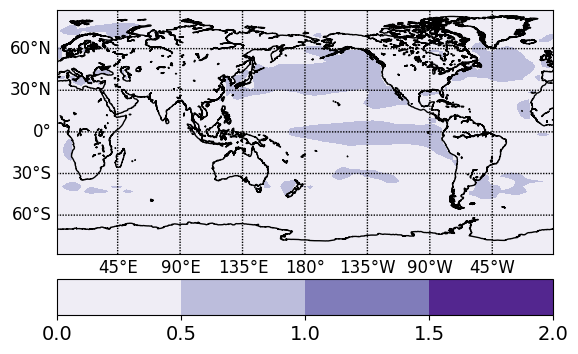

<Figure size 640x480 with 0 Axes>

In [15]:

def plot_map(lon,lat,data,file_name):
#     m = Basemap(projection='cyl', resolution='l',
#             llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
#             llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )

    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat_sst), urcrnrlat=np.max(lat_sst),
            llcrnrlon=np.min(lon_sst), urcrnrlon=np.max(lon_sst), )
    #m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    #m.drawcoastlines()
    #levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    levels = np.linspace(0.0,2.0,5)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='Purples')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    cb.ax.tick_params(labelsize=14)  # Increase font size of colorbar ticks
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0], fontsize=12)
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1], fontsize=12)
    #plt.title('sst')
    #cb.set_label('sst')

    plt.savefig(file_name,dpi=300,bbox_inches='tight')
    


    plt.show()
    plt.clf()

print('VAE')
plot_map(lon_sst,lat_sst,vae_anom_ds.std(dim=['time'])['sst'].values,'../Data/output/GISS/vae_anomaly_std.png')
print('GAN')
plot_map(lon_sst,lat_sst,gan_anom_ds.std(dim=['time'])['sst'].values,'../Data/output/GISS/gan_anomaly_std.png')
print('Diffusion')
plot_map(lon_sst,lat_sst,diffusion_anom_ds.std(dim=['time'])['sst'].values,'../Data/output/GISS/diffusion_anomaly_std.png')
print('CMIP6')
plot_map(lon_sst,lat_sst,ori_anom_ds.std(dim=['time'])['sst'].values,'../Data/output/GISS/ori_anomaly_std.png')
print('COBE')
plot_map(lon_sst,lat_sst,obs_anom_ds.std(dim=['time'])['sst'].values,'../Data/output/GISS/cobe_anomaly_std.png')


VAE


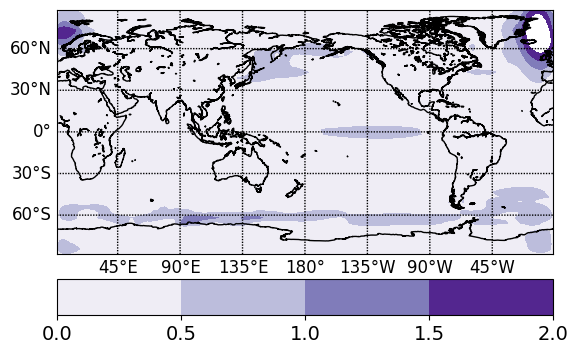

VAE


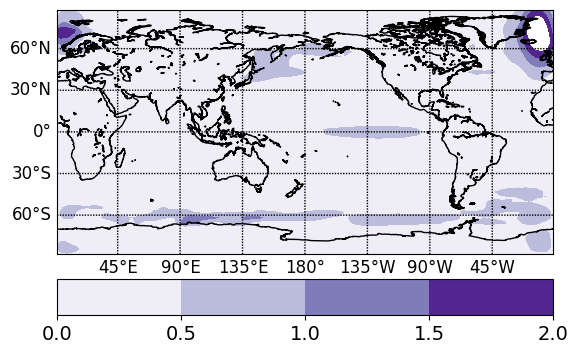

<Figure size 640x480 with 0 Axes>

In [16]:
# Calculate the 3-month moving average
vae_anom_ds_3mo_avg = vae_anom_ds.rolling(time=3, center=True).mean()

# Calculate the standard deviation of the 3-month moving average
vae_anom_ds_3mo_std = vae_anom_ds_3mo_avg.std(dim=['time'])

# Plot the standard deviation of the 3-month moving average

print('VAE')
plot_map(lon_sst,lat_sst,vae_anom_ds_3mo_std['sst'].values,'../Data/output/GISS/vae_anomaly_std_3_ma.png')

# Calculate the 5-month moving average
vae_anom_ds_5mo_avg = vae_anom_ds.rolling(time=5, center=True).mean()

# Calculate the standard deviation of the 5-month moving average
vae_anom_ds_5mo_std = vae_anom_ds_5mo_avg.std(dim=['time'])

# Plot the standard deviation of the 5-month moving average
print('VAE')
plot_map(lon_sst,lat_sst,vae_anom_ds_5mo_std['sst'].values,'../Data/output/GISS/vae_anomaly_std_5_ma.png')

GAN


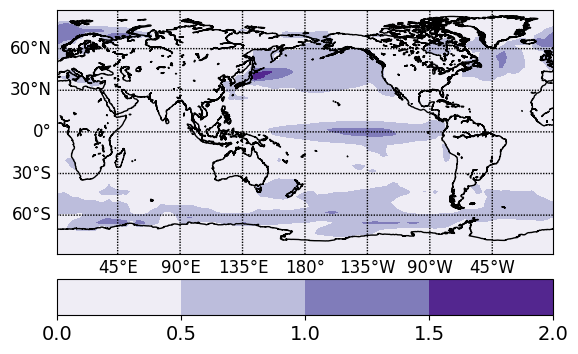

<Figure size 640x480 with 0 Axes>

In [17]:
# Calculate the 3-month moving average
gan_anom_ds_3mo_avg = gan_anom_ds.rolling(time=3, center=True).mean()

# Calculate the standard deviation of the 3-month moving average
gan_anom_ds_3mo_std = gan_anom_ds_3mo_avg.std(dim=['time'])

# Plot the standard deviation of the 3-month moving average

print('GAN')
plot_map(lon_sst,lat_sst,gan_anom_ds_3mo_std['sst'].values,'../Data/output/GISS/gan_anomaly_std_3_ma.png')



Diffusion


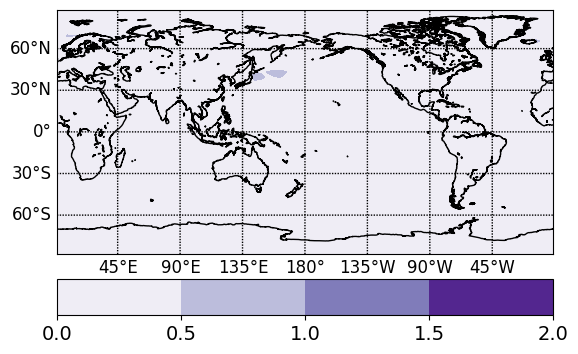

<Figure size 640x480 with 0 Axes>

In [18]:
# Calculate the 3-month moving average
diffusion_anom_ds_3mo_avg = diffusion_anom_ds.rolling(time=3, center=True).mean()

# Calculate the standard deviation of the 3-month moving average
diffusion_anom_ds_3mo_std = diffusion_anom_ds_3mo_avg.std(dim=['time'])

# Plot the standard deviation of the 3-month moving average

print('Diffusion')
plot_map(lon_sst,lat_sst,diffusion_anom_ds_3mo_std['sst'].values,'../Data/output/GISS/diffusion_anomaly_std_3_ma.png')



CMIP6


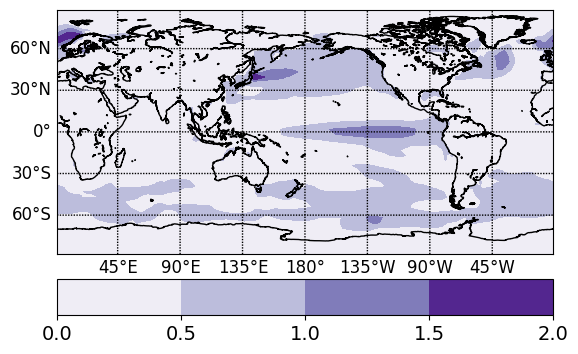

CMIP6


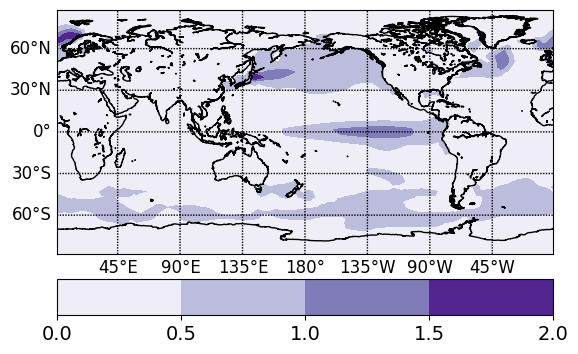

<Figure size 640x480 with 0 Axes>

In [19]:
# Calculate the 3-month moving average
ori_anom_ds_3mo_avg = ori_anom_ds.rolling(time=3, center=True).mean()

# Calculate the standard deviation of the 3-month moving average
ori_anom_ds_3mo_std = ori_anom_ds_3mo_avg.std(dim=['time'])

# Plot the standard deviation of the 3-month moving average

print('CMIP6')
plot_map(lon_sst,lat_sst,ori_anom_ds_3mo_std['sst'].values,'../Data/output/GISS/ori_anomaly_std_3_ma.png')

# Calculate the 5-month moving average
ori_anom_ds_5mo_avg = ori_anom_ds.rolling(time=5, center=True).mean()

# Calculate the standard deviation of the 5-month moving average
ori_anom_ds_5mo_std = ori_anom_ds_5mo_avg.std(dim=['time'])

# Plot the standard deviation of the 5-month moving average
print('CMIP6')
plot_map(lon_sst,lat_sst,ori_anom_ds_5mo_std['sst'].values,'../Data/output/GISS/ori_anomaly_std_5_ma.png')

COBE


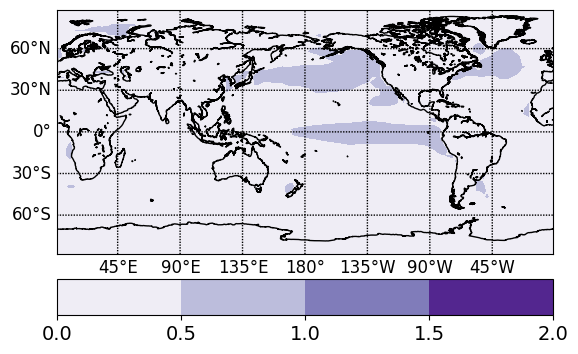

COBE


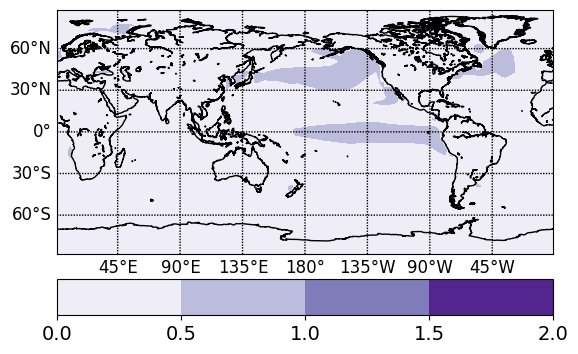

<Figure size 640x480 with 0 Axes>

In [20]:
# Calculate the 3-month moving average
obs_anom_ds_3mo_avg = obs_anom_ds.rolling(time=3, center=True).mean()

# Calculate the standard deviation of the 3-month moving average
obs_anom_ds_3mo_std = obs_anom_ds_3mo_avg.std(dim=['time'])

# Plot the standard deviation of the 3-month moving average

print('COBE')
plot_map(lon_sst,lat_sst,obs_anom_ds_3mo_std['sst'].values,'../Data/output/GISS/cobe_anomaly_std_3_ma.png')

# Calculate the 5-month moving average
obs_anom_ds_5mo_avg = obs_anom_ds.rolling(time=5, center=True).mean()

# Calculate the standard deviation of the 5-month moving average
obs_anom_ds_5mo_std = obs_anom_ds_5mo_avg.std(dim=['time'])

# Plot the standard deviation of the 5-month moving average
print('COBE')
plot_map(lon_sst,lat_sst,obs_anom_ds_5mo_std['sst'].values,'../Data/output/GISS/cobe_anomaly_std_5_ma.png')

# EOF of Anomaly for 3 months moving average (Figure 7,8,9)

In [18]:
vae_anom_ds_3mo_avg = vae_anom_ds.rolling(time=3, center=True).mean().fillna(0)
diffusion_anom_ds_3mo_avg = diffusion_anom_ds.rolling(time=3, center=True).mean().fillna(0)
gan_anom_ds_3mo_avg = gan_anom_ds.rolling(time=3, center=True).mean().fillna(0)
ori_anom_ds_3mo_avg = ori_anom_ds.rolling(time=3, center=True).mean().fillna(0)
obs_anom_ds_3mo_avg = obs_anom_ds.rolling(time=3, center=True).mean().fillna(0)

In [19]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 20 22:18:26 2021

@author: Devabrat
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
import pylab as pl
from scipy import signal
import matplotlib.pyplot as plt
import scipy.stats
from netCDF4 import Dataset

def cal_power_spect(data):
    #data=N_EP_gen#np.loadtxt('iod.txt', dtype=np.float32)
    #data=data_whole.variables['temp'][:]
    #data=data.reshape(data.shape[0],)

    nd=len(data)


    nrho=len(data)
    rho=0
    sommesup=0
    sommeinf=0
    for i in range(1,nrho):
        j=i-1
        sommesup=sommesup+(data[i]*data[j])
        sommeinf=sommeinf+((data[j]**2))

    rho=sommesup/sommeinf

    nt=len(data)

    rzero=0
    redtab=[]
    red=[]

    srho=np.sqrt(1-rho**2)

    nsim=1500

    red_sum=np.zeros((nd, nsim))
    for i in range(nsim):
    
        white=srho*np.random.randn(1)
        red_sum[0,i]=rho*rzero+white
        
        for j in range(1,nd):
            white=srho*np.random.randn(1)
            red_sum[j,i]=rho*red_sum[j-1,i]+white
            
    redtab.append(red_sum)
        
    redtab=np.array(redtab)
    redtab=redtab.reshape(nd,nsim)


    fs=1
    f, Po = signal.periodogram(data, fs, detrend='linear')

    npo=len(Po)
    Po=Po.reshape(npo,)

    Ax=np.sum(Po)/npo

    red2=[]
    specred=np.zeros((npo,nsim))

    for i in range(nsim):
        red2=redtab[:,i]
        red2m=np.sum(red2)/nd
        red2n=red2-red2m
        fs=1
        fr, Pr = signal.periodogram(red2n, fs, detrend='linear')  #detrend = linear
        npr=len(Pr)
        Pr=Pr.reshape(npr,)
        
        Ar=np.sum(Pr)/npr
        Pr=Pr*(Ax/Ar)
        specred[:,i]=Pr
        
    Mpr=0
    Mspecred=[]
    for i in range(npr):
        Mpr=specred[i,1]
        for j in range(1,nsim):
            Mpr=Mpr+specred[i,j]
        
        Mpr=np.sum(Mpr)/nsim
        Mspecred.append(Mpr)

    Mspecred=np.array(Mspecred)


    period_Po=1/f
    period_Pr=1/fr


    n85=round(1500*85/100)
    n90=round(1500*90/100)
    n95=round(1500*95/100)
    n99=round(1500*99/100)


    tabvecsort=np.zeros((npr,nsim))
    for i in range(npr):
        vec=specred[i,:]
        tabvecsort[i,:]=np.sort(vec)
        
    tabMC=np.zeros((npr,4))

    for i in range(npr):
        tabMC[i,0]=tabvecsort[i,n85]
        tabMC[i,1]=tabvecsort[i,n90]
        tabMC[i,2]=tabvecsort[i,n95]
        tabMC[i,3]=tabvecsort[i,n99]
        

        
    plot=np.zeros((Po.shape[0],3), dtype=np.float32)

    plot[:,0]=period_Po
    plot[:,1]=f*Po
    plot[:,2]=f*tabMC[:,2]
    return plot





VAE


/tmp/ipykernel_781946/152164501.py:14: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver = Eof(Data, weights=wgts)


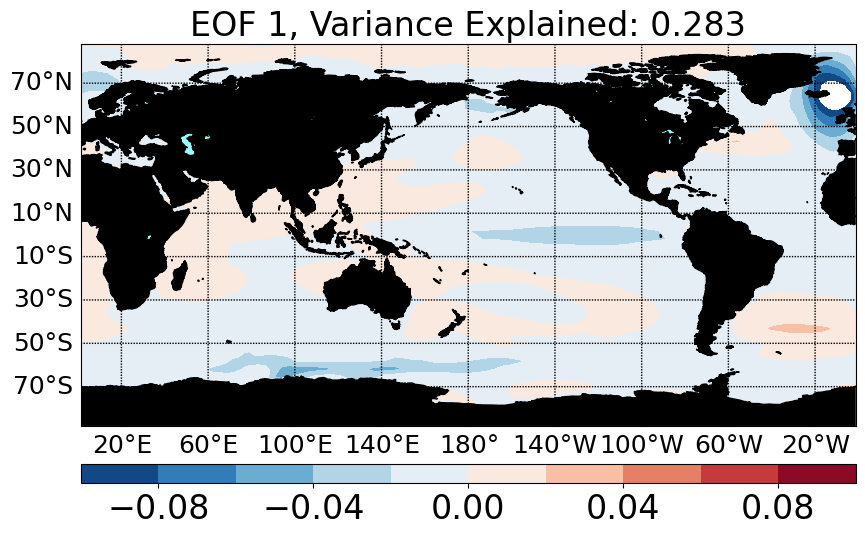

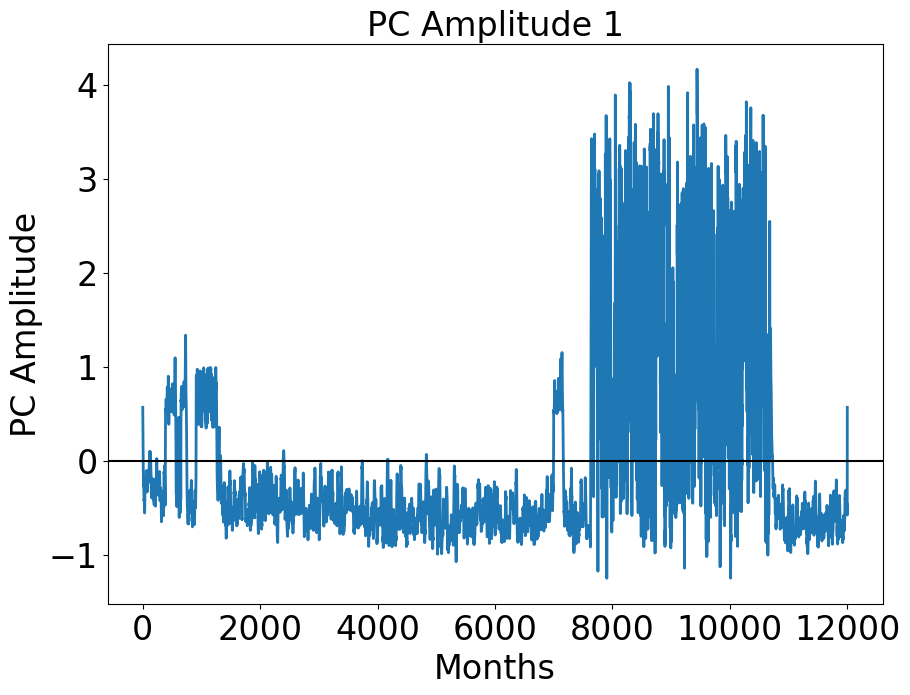

/tmp/ipykernel_781946/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_781946/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_781946/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_781946/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


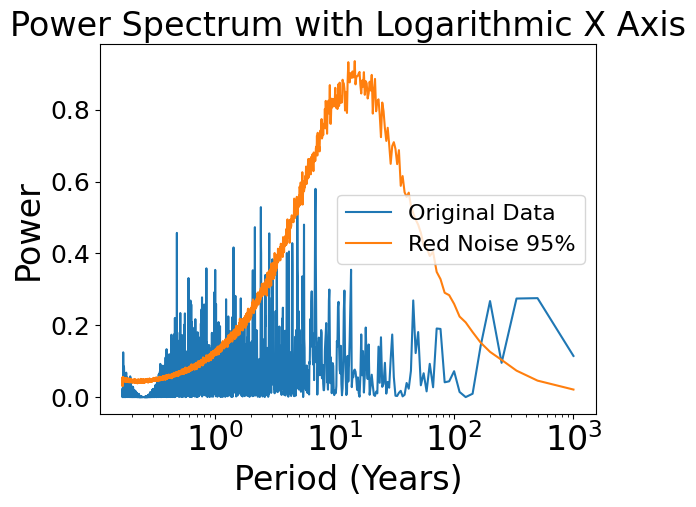

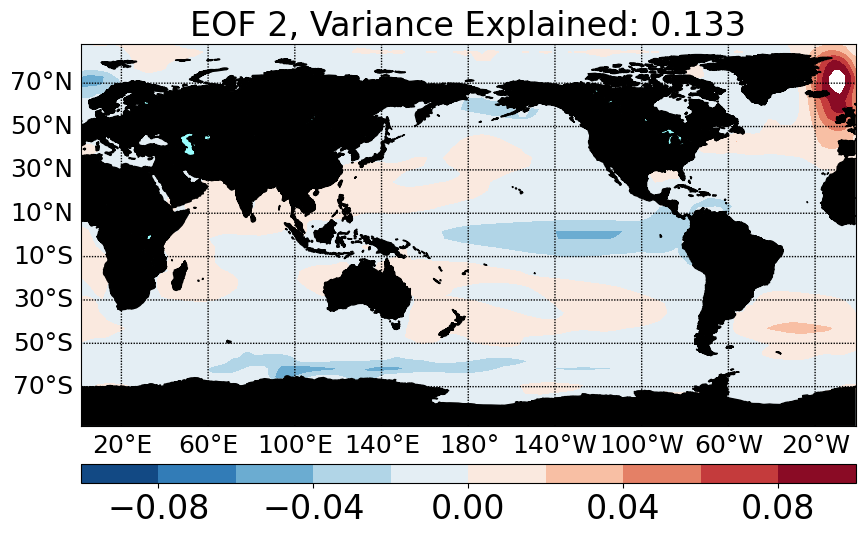

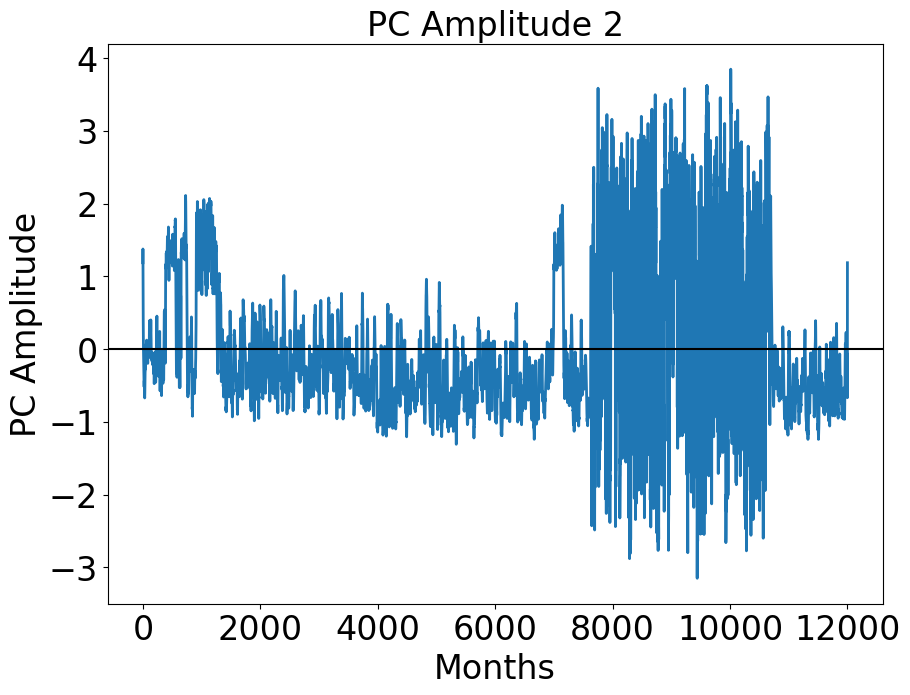

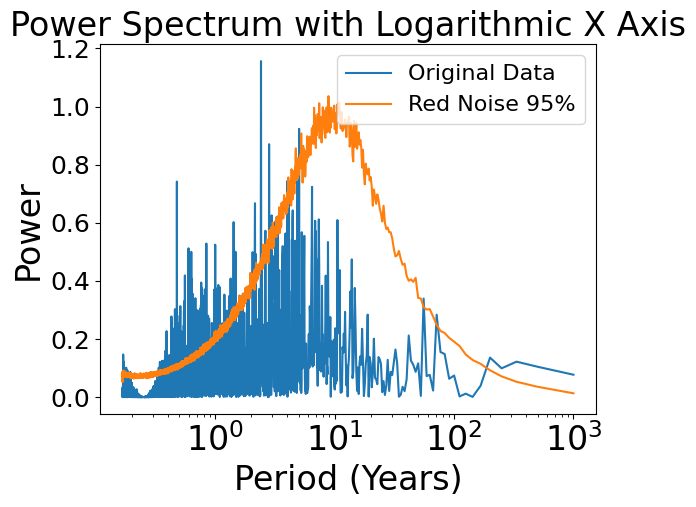

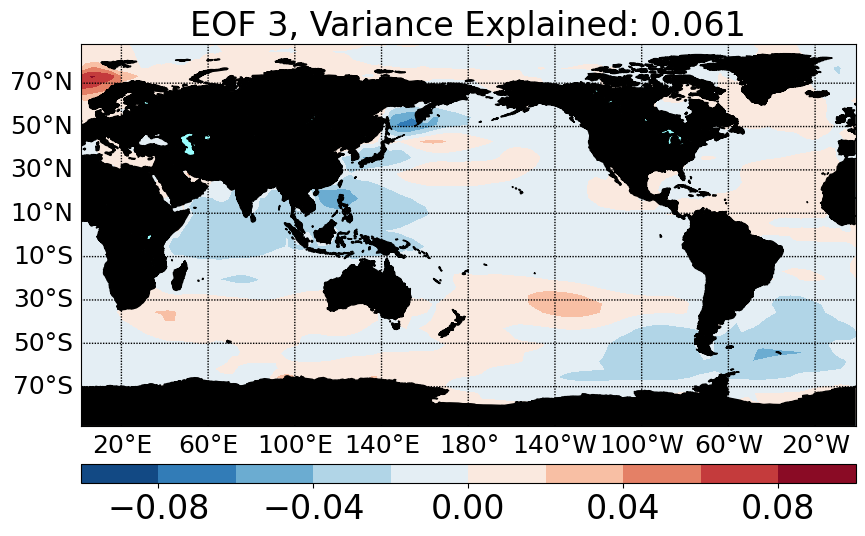

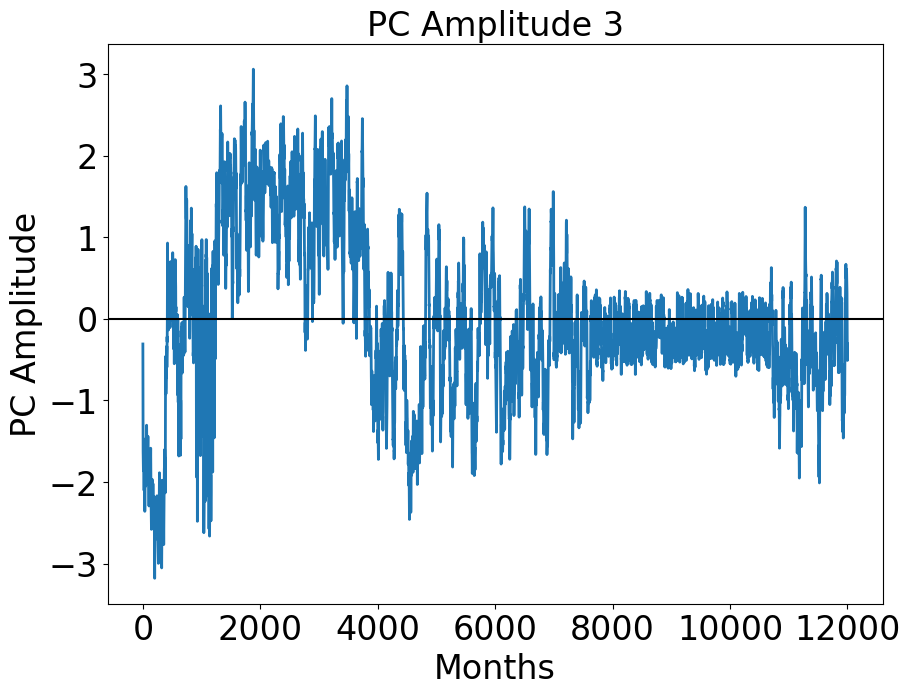

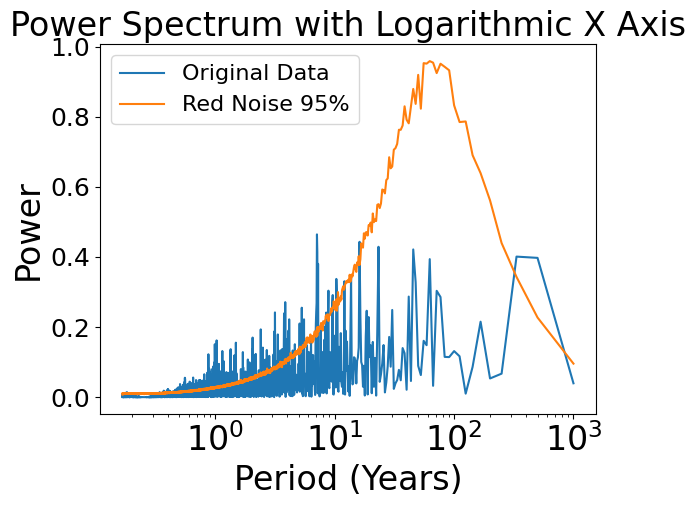

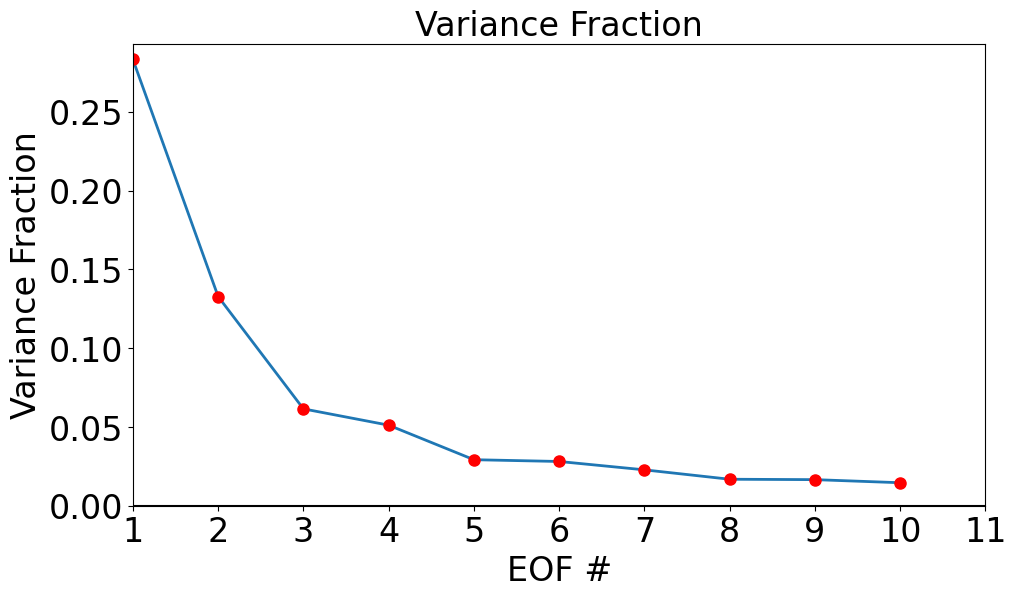

In [20]:
print('VAE')
lat = lat_sst
lon = lon_sst

# Remove all time steps where all values are NaN
sst_data = vae_anom_ds_3mo_avg['sst'].values  # shape: (time, lat, lon)
# Find time indices where not all values are NaN
valid_time_idx = ~np.all(np.isnan(sst_data), axis=(1, 2))
Data = sst_data[valid_time_idx]

wgts = np.cos(np.deg2rad(lat)).reshape(len(lat), 1)
coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(Data, weights=wgts)
eof1 = solver.eofs()

pc=solver.pcs(pcscaling=1)
varfrac=solver.varianceFraction()
lambdas=solver.eigenvalues()


parallels = np.arange(-90,90,20)
meridians = np.arange(-180,180,40)



for i in range(3):
    fig=plt.figure(figsize=(10,16)) 

    m=Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
            urcrnrlon=max(lon), urcrnrlat=max(lat), resolution='l')
    x, y = m(*np.meshgrid(lon,lat))
    clevs = np.linspace(-0.1,0.1,11)
    cs = m.contourf(x,y,eof1[i,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
    m.drawcoastlines()
    m.fillcontinents(color='#000000',lake_color='#99ffff')
    
    m.drawparallels(parallels,labels=[1,0,0,0], fontsize=18)
    m.drawmeridians(meridians,labels=[1,0,0,1], fontsize=18)

    cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
    cb.ax.tick_params(labelsize=24)  # Increase font size of colorbar ticks
    #cb.set_label('EOF', fontsize=10)
    plt.title('EOF '+str(i+1)+', Variance Explained: '+str(round(varfrac[i],3)), fontsize=24)  
    plt.savefig('../Data/output/GISS/EOF/Eof_vae_anomaly_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()
    fig=plt.figure(figsize=(10,16))
    plt.subplot(212)
    #days = pd.date_range('1871-01-01', '2011-01-01', freq='ME')
    plt.plot( pc[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel('Months', fontsize=24)
    plt.ylabel('PC Amplitude', fontsize=24) 
    plt.title('PC Amplitude '+str(i+1), fontsize=24)    
    plt.savefig('../Data/output/GISS/EOF/PC_Amplitude_vae_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()

    plot=cal_power_spect(pc[:,i])
    plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
    plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
    plt.xscale('log')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=18)
    plt.xlabel('Period (Years)', fontsize=24)
    plt.ylabel('Power', fontsize=24)
    plt.legend(fontsize=16)
    plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
    plt.savefig('../Data/output/GISS/EOF/PC_'+str(i+1)+'Pow_Spec_vae.png',dpi=300,bbox_inches='tight')
    plt.show()

plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2)
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16),fontsize=24)
plt.yticks(fontsize=24)
plt.title('Fraction of the total variance represented by each EOF', fontsize=15)
plt.xlabel('EOF #', fontsize=24)
plt.ylabel('Variance Fraction', fontsize=24)
plt.xlim(1, 11)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)
plt.title('Variance Fraction', fontsize=24)  
plt.savefig('../Data/output/GISS/EOF/Variance_Fraction_vae_3ma.png',dpi=300,bbox_inches='tight')
plt.show()

GAN


/tmp/ipykernel_781946/123413766.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver =Eof(Data,weights=wgts)


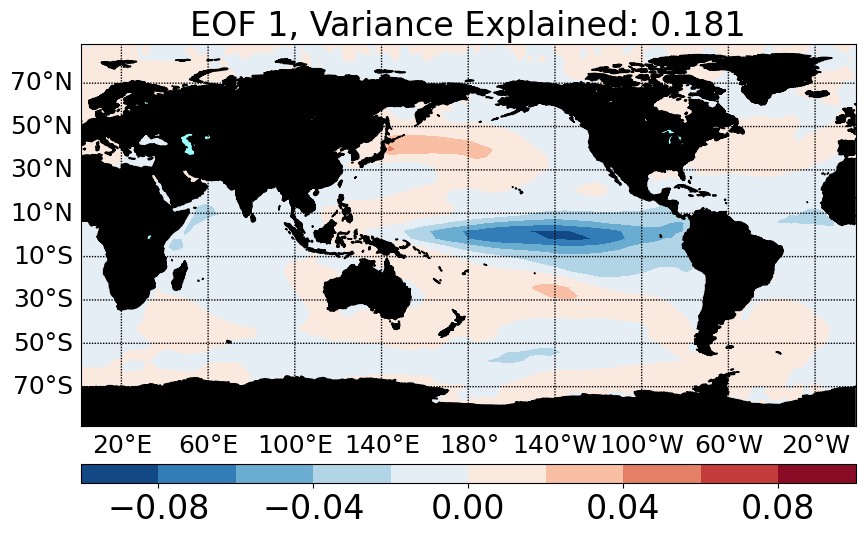

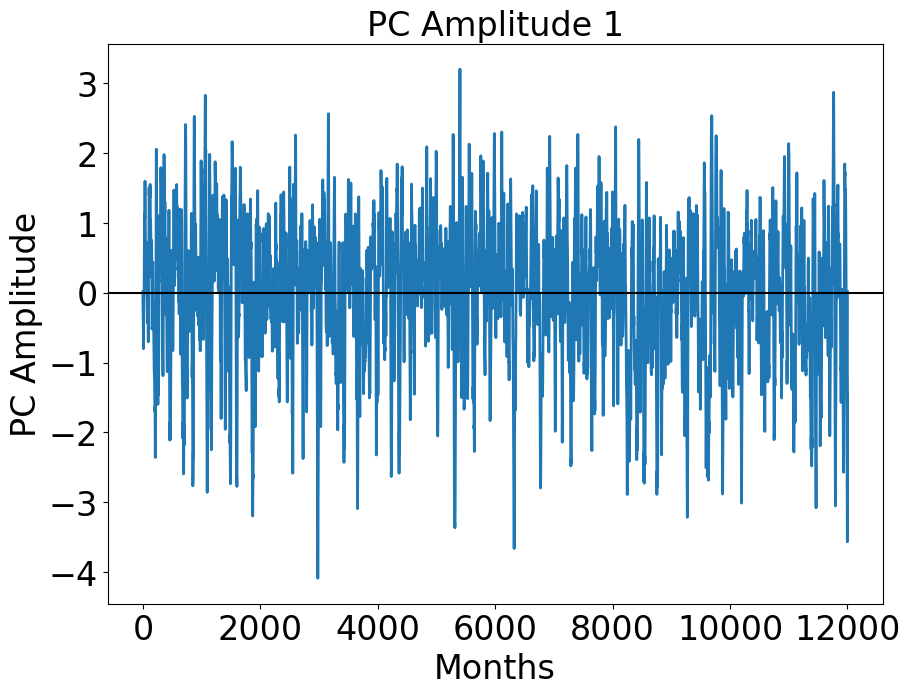

/tmp/ipykernel_781946/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_781946/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_781946/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_781946/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


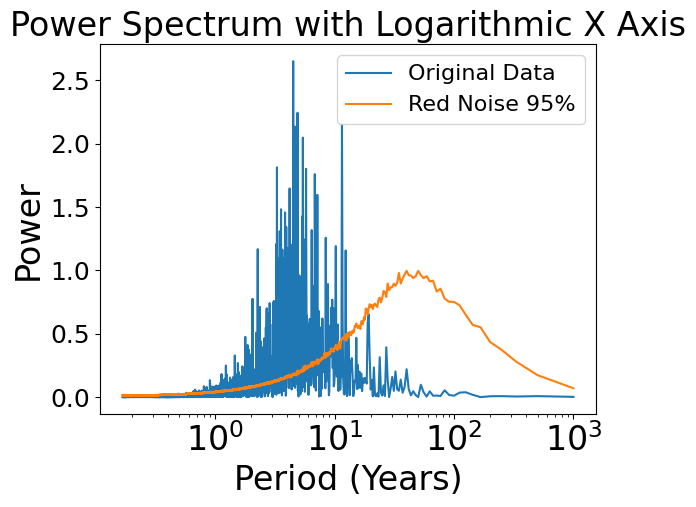

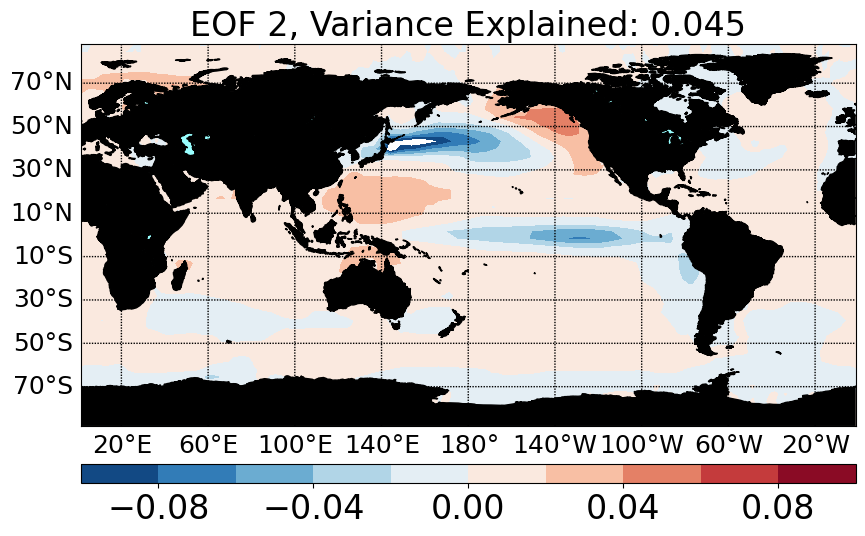

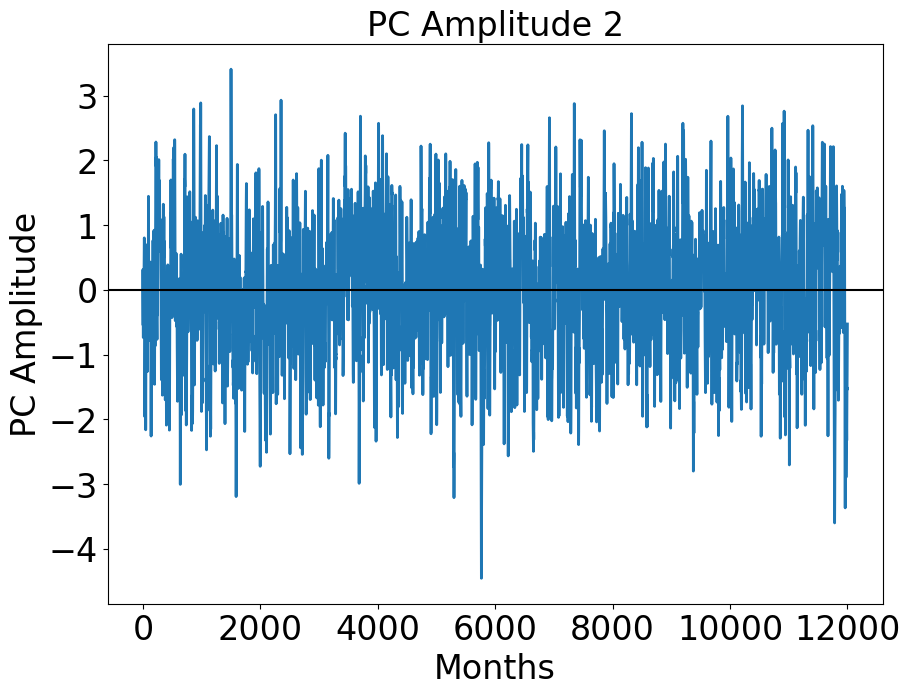

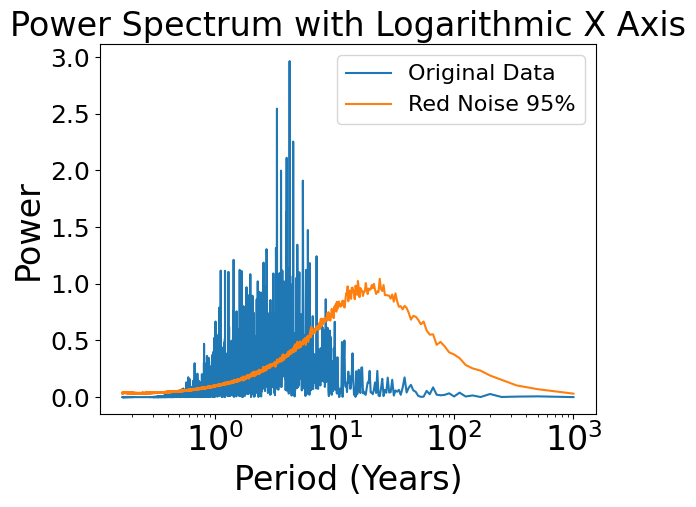

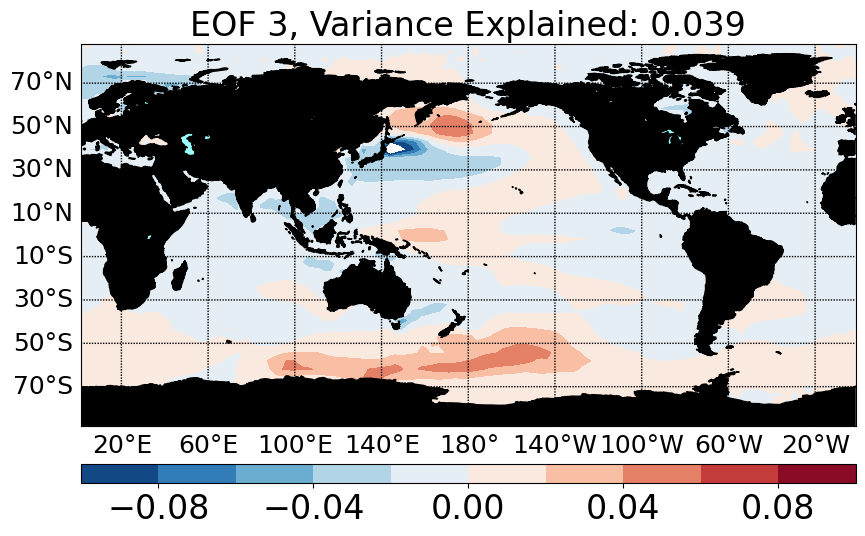

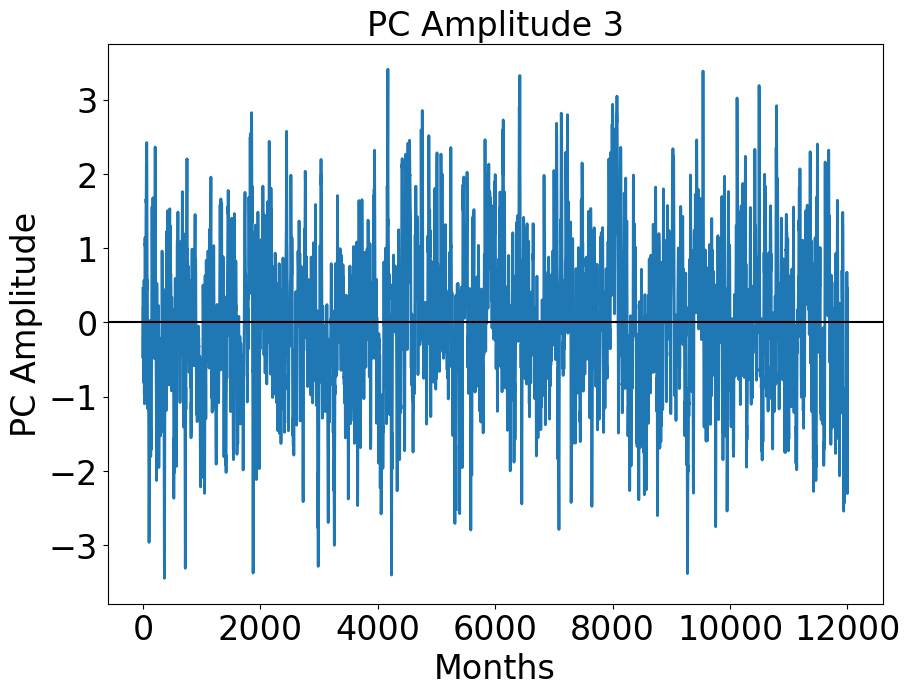

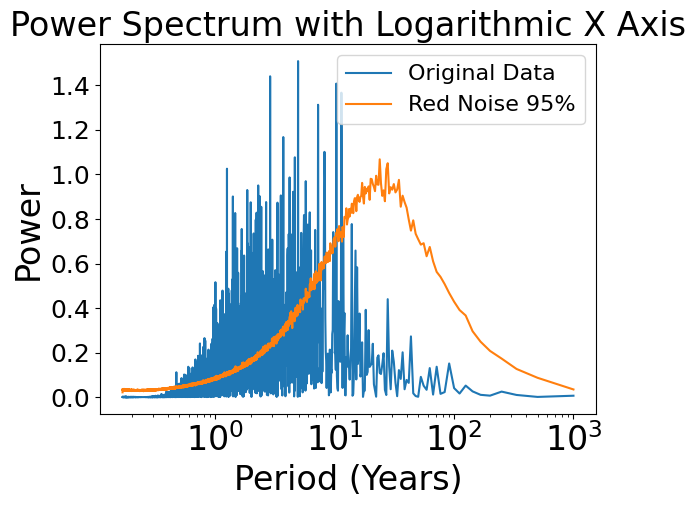

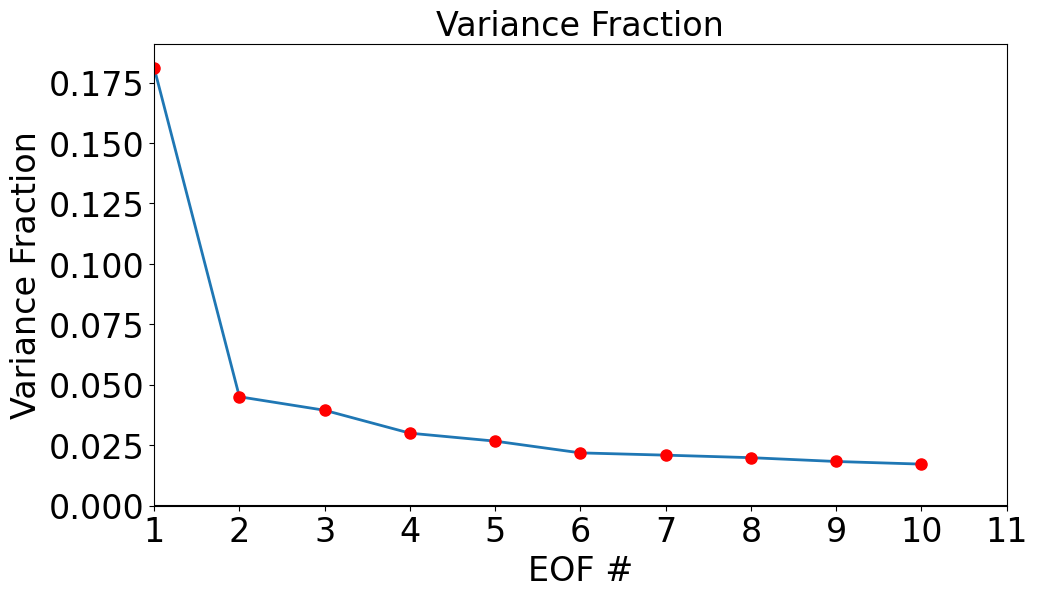

In [21]:
print('GAN')
lat=lat_sst
lon=lon_sst
Data=gan_anom_ds_3mo_avg.fillna(0)['sst'].values.reshape(12000,48,144)#[:6000]
wgts   = np.cos(np.deg2rad(lat))
wgts   = wgts.reshape(len(wgts), 1)
#solver1 = Eof(np.array(ser_original[6]), weights=wgts)

coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver =Eof(Data,weights=wgts)
eof1=solver.eofs()

pc=solver.pcs(pcscaling=1)
varfrac=solver.varianceFraction()
lambdas=solver.eigenvalues()


parallels = np.arange(-90,90,20)
meridians = np.arange(-180,180,40)



for i in range(3):
    fig=plt.figure(figsize=(10,16)) 

    m=Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
            urcrnrlon=max(lon), urcrnrlat=max(lat), resolution='l')
    x, y = m(*np.meshgrid(lon,lat))
    clevs = np.linspace(-0.1,0.1,11)
    cs = m.contourf(x,y,eof1[i,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
    m.drawcoastlines()
    m.fillcontinents(color='#000000',lake_color='#99ffff')
    
    m.drawparallels(parallels,labels=[1,0,0,0], fontsize=18)
    m.drawmeridians(meridians,labels=[1,0,0,1], fontsize=18)

    cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
    cb.ax.tick_params(labelsize=24)  # Increase font size of colorbar ticks
    #cb.set_label('EOF', fontsize=10)
    plt.title('EOF '+str(i+1)+', Variance Explained: '+str(round(varfrac[i],3)), fontsize=24)  
    plt.savefig('../Data/output/GISS/EOF/Eof_gan_anomaly_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()
    fig=plt.figure(figsize=(10,16))
    plt.subplot(212)
    #days = pd.date_range('1871-01-01', '2011-01-01', freq='ME')
    plt.plot( pc[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel('Months', fontsize=24)
    plt.ylabel('PC Amplitude', fontsize=24) 
    plt.title('PC Amplitude '+str(i+1), fontsize=24)    
    plt.savefig('../Data/output/GISS/EOF/PC_Amplitude_gan_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()

    plot=cal_power_spect(pc[:,i])
    plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
    plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
    plt.xscale('log')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=18)
    plt.xlabel('Period (Years)', fontsize=24)
    plt.ylabel('Power', fontsize=24)
    plt.legend(fontsize=16)
    plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
    plt.savefig('../Data/output/GISS/EOF/PC_'+str(i+1)+'Pow_Spec_gan.png',dpi=300,bbox_inches='tight')
    plt.show()

plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2)
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16),fontsize=24)
plt.yticks(fontsize=24)
plt.title('Fraction of the total variance represented by each EOF', fontsize=15)
plt.xlabel('EOF #', fontsize=24)
plt.ylabel('Variance Fraction', fontsize=24)
plt.xlim(1, 11)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)
plt.title('Variance Fraction', fontsize=24)  
plt.savefig('../Data/output/GISS/EOF/Variance_Fraction_gan_3ma.png',dpi=300,bbox_inches='tight')
plt.show()

Diffusion


/tmp/ipykernel_781946/3567336894.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver =Eof(Data,weights=wgts)


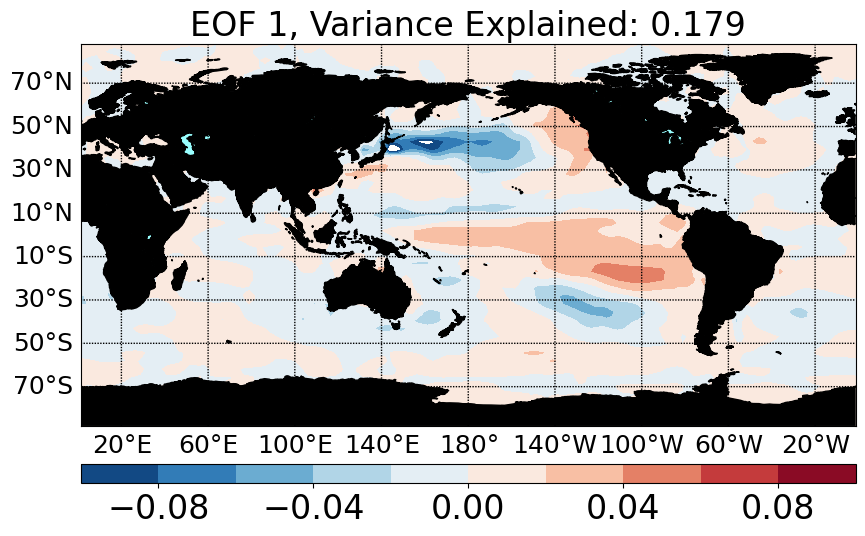

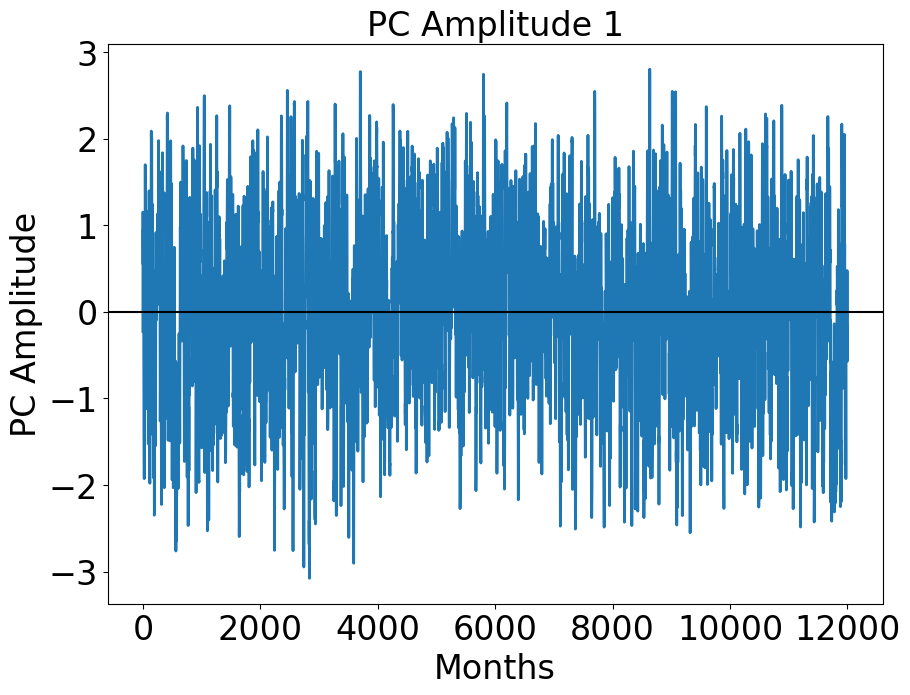

/tmp/ipykernel_781946/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_781946/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_781946/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_781946/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


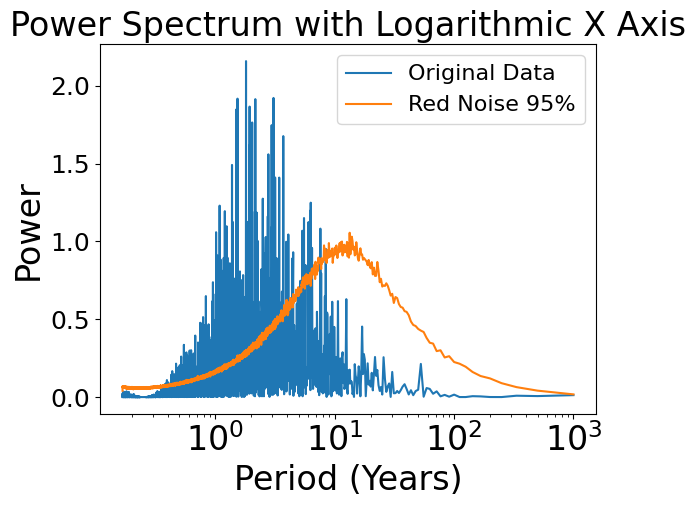

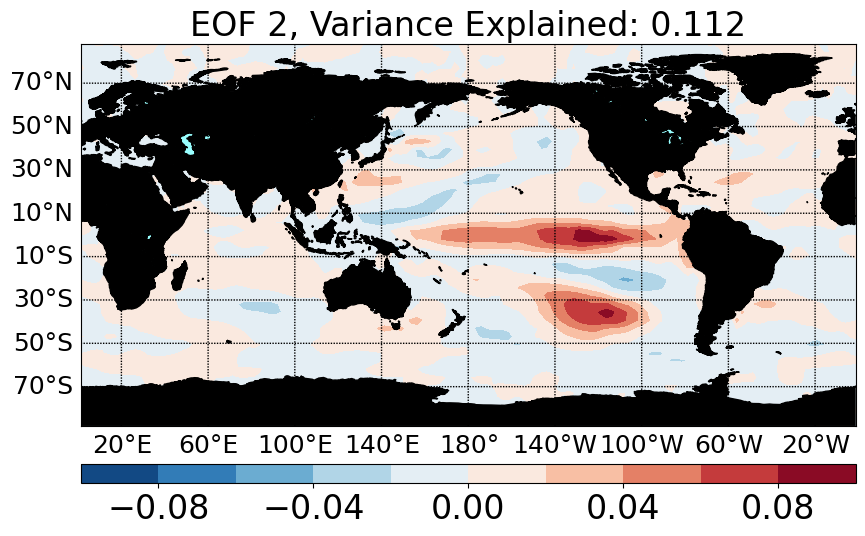

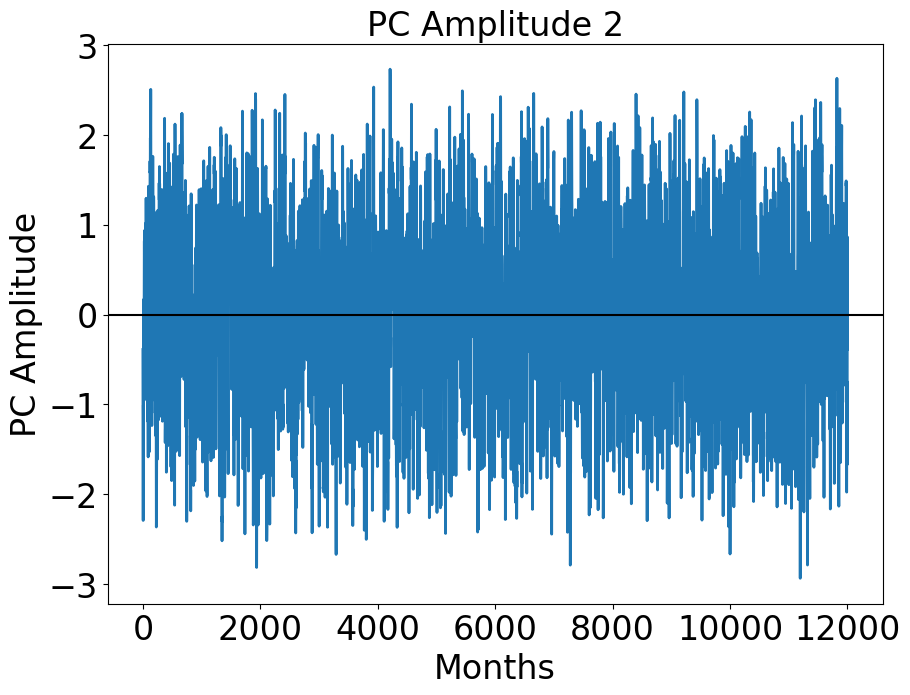

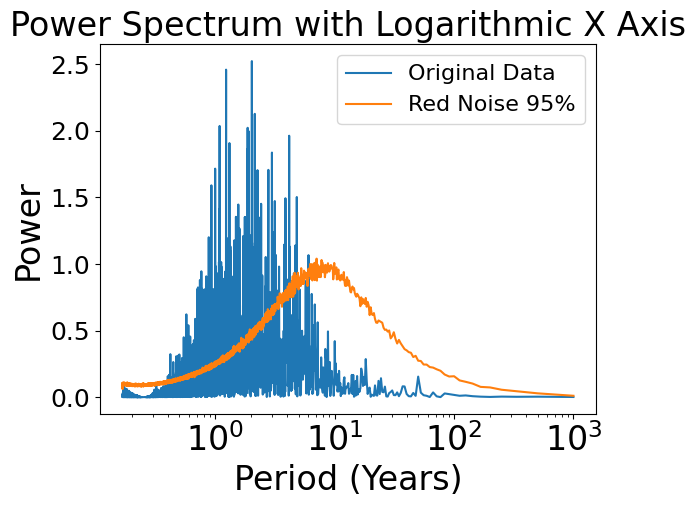

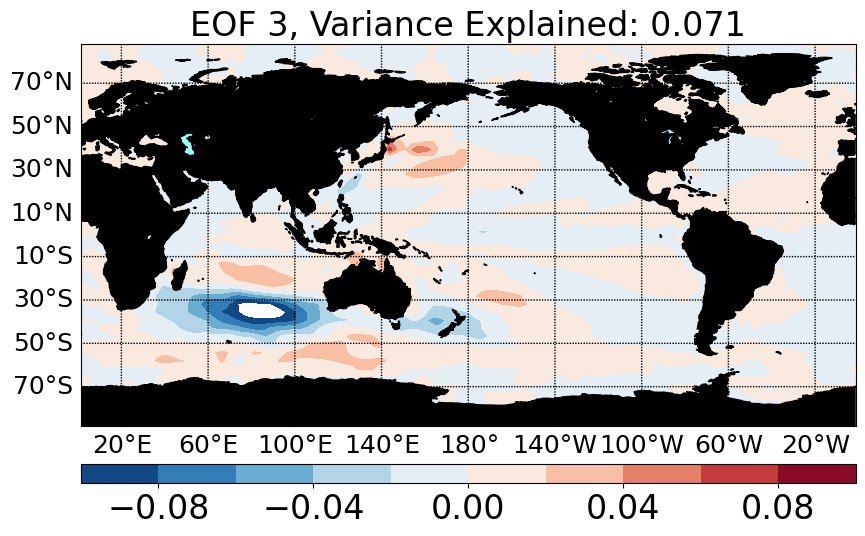

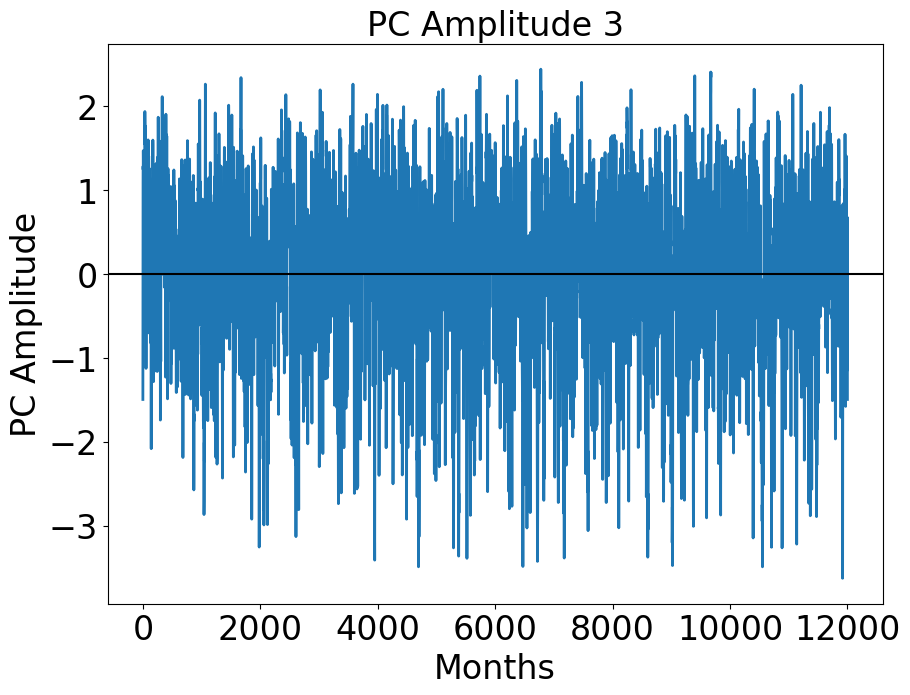

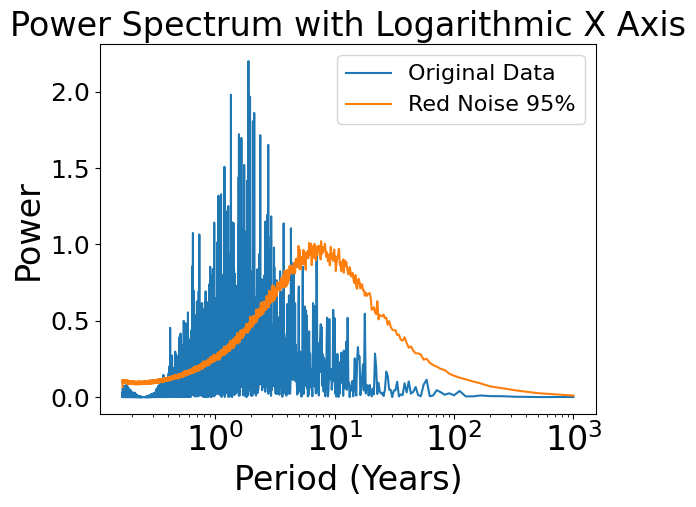

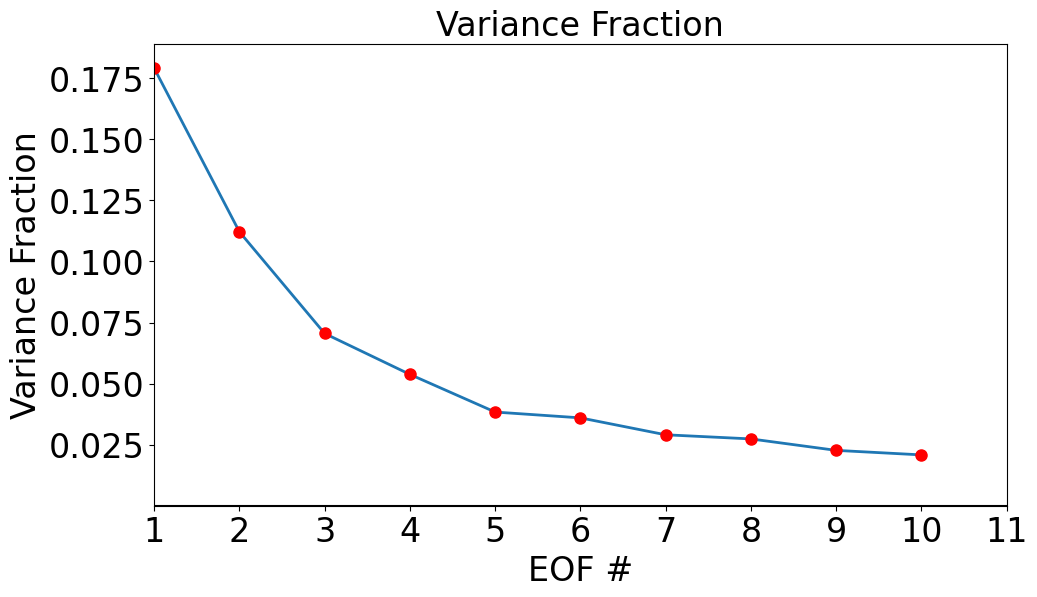

In [22]:
print('Diffusion')
lat=lat_sst
lon=lon_sst
Data=diffusion_anom_ds_3mo_avg.fillna(0)['sst'].values.reshape(12000,48,144)#[:6000]
wgts   = np.cos(np.deg2rad(lat))
wgts   = wgts.reshape(len(wgts), 1)
#solver1 = Eof(np.array(ser_original[6]), weights=wgts)

coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver =Eof(Data,weights=wgts)
eof1=solver.eofs()

pc=solver.pcs(pcscaling=1)
varfrac=solver.varianceFraction()
lambdas=solver.eigenvalues()


parallels = np.arange(-90,90,20)
meridians = np.arange(-180,180,40)



for i in range(3):
    fig=plt.figure(figsize=(10,16)) 

    m=Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
            urcrnrlon=max(lon), urcrnrlat=max(lat), resolution='l')
    x, y = m(*np.meshgrid(lon,lat))
    clevs = np.linspace(-0.1,0.1,11)
    cs = m.contourf(x,y,eof1[i,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
    m.drawcoastlines()
    m.fillcontinents(color='#000000',lake_color='#99ffff')
    
    m.drawparallels(parallels,labels=[1,0,0,0], fontsize=18)
    m.drawmeridians(meridians,labels=[1,0,0,1], fontsize=18)

    cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
    cb.ax.tick_params(labelsize=24)  # Increase font size of colorbar ticks
    #cb.set_label('EOF', fontsize=10)
    plt.title('EOF '+str(i+1)+', Variance Explained: '+str(round(varfrac[i],3)), fontsize=24)  
    plt.savefig('../Data/output/GISS/EOF/Eof_diffusion_anomaly_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()
    fig=plt.figure(figsize=(10,16))
    plt.subplot(212)
    #days = pd.date_range('1871-01-01', '2011-01-01', freq='ME')
    plt.plot( pc[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel('Months', fontsize=24)
    plt.ylabel('PC Amplitude', fontsize=24) 
    plt.title('PC Amplitude '+str(i+1), fontsize=24)    
    plt.savefig('../Data/output/GISS/EOF/PC_Amplitude_diffusion_'+str(i+1)+'_3ma.png',dpi=300,bbox_inches='tight')
    plt.show()

    plot=cal_power_spect(pc[:,i])
    plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
    plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
    plt.xscale('log')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=18)
    plt.xlabel('Period (Years)', fontsize=24)
    plt.ylabel('Power', fontsize=24)
    plt.legend(fontsize=16)
    plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
    plt.savefig('../Data/output/GISS/EOF/PC_'+str(i+1)+'Pow_Spec_diffusion.png',dpi=300,bbox_inches='tight')
    plt.show()

plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2)
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16),fontsize=24)
plt.yticks(fontsize=24)
plt.title('Fraction of the total variance represented by each EOF', fontsize=15)
plt.xlabel('EOF #', fontsize=24)
plt.ylabel('Variance Fraction', fontsize=24)
plt.xlim(1, 11)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)
plt.title('Variance Fraction', fontsize=24)  
plt.savefig('../Data/output/GISS/EOF/Variance_Fraction_diffusion_3ma.png',dpi=300,bbox_inches='tight')
plt.show()

# ONI (Figure 10 a, b,c,d)

In [23]:
ONI_vae=vae_anom_ds.sel(lat=slice(-5.0,5.0),lon=slice(170,240))['sst'].mean(['lat','lon'])
ONI_diffusion=diffusion_anom_ds.sel(lat=slice(-5.0,5.0),lon=slice(170,240))['sst'].mean(['lat','lon'])

ONI_ori=ori_anom_ds.sel(lat=slice(-5.0,5.0),lon=slice(170,240))['sst'].mean(['lat','lon'])

ONI_obs=obs_anom_ds.sel(lat=slice(-5.0,5.0),lon=slice(170,240))['sst'].mean(['lat','lon'])

ONI_gan=gan_anom_ds.sel(lat=slice(-5.0,5.0),lon=slice(170,240))['sst'].mean(['lat','lon'])

In [24]:
ONI_vae_3mo_avg = ONI_vae.rolling(time=3, center=True).mean().fillna(0)
ONI_diffusion_3mo_avg = ONI_diffusion.rolling(time=3, center=True).mean().fillna(0)
ONI_gan_3mo_avg = ONI_gan.rolling(time=3, center=True).mean().fillna(0)
ONI_ori_3mo_avg = ONI_ori.rolling(time=3, center=True).mean().fillna(0)
ONI_obs_3mo_avg = ONI_obs.rolling(time=3, center=True).mean().fillna(0)

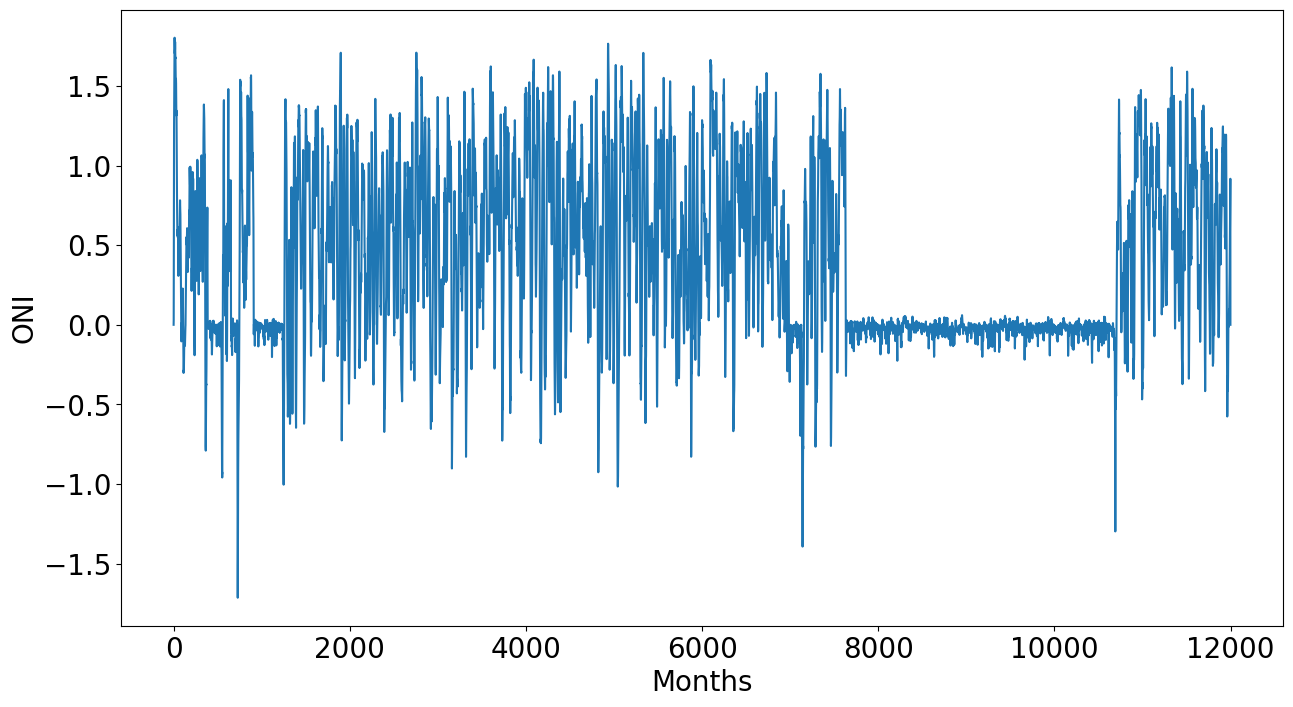

In [28]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(ONI_vae_3mo_avg.values.reshape(12000))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')

plt.xlabel('Months',fontsize=20)
plt.ylabel('ONI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/GISS/ONI_3ma_vae.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_247894/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_247894/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_247894/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_247894/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


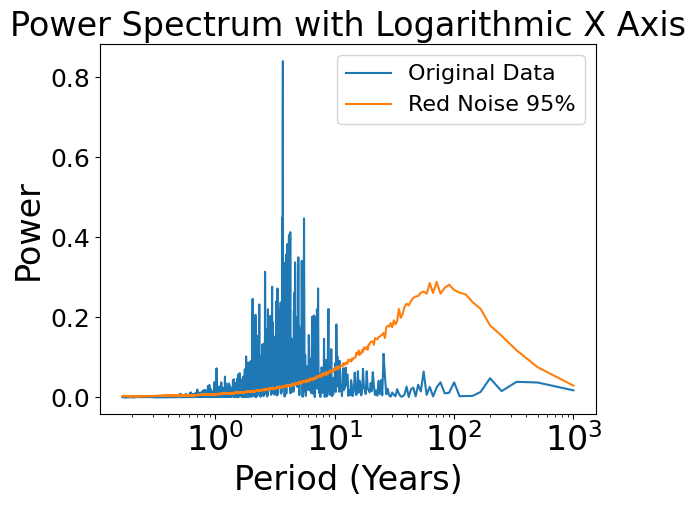

In [29]:
plot=cal_power_spect(ONI_vae_3mo_avg.values.reshape(12000))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/GISS/ONI_3ma_pow_spec_vae.png',dpi=300,bbox_inches='tight')
plt.show()

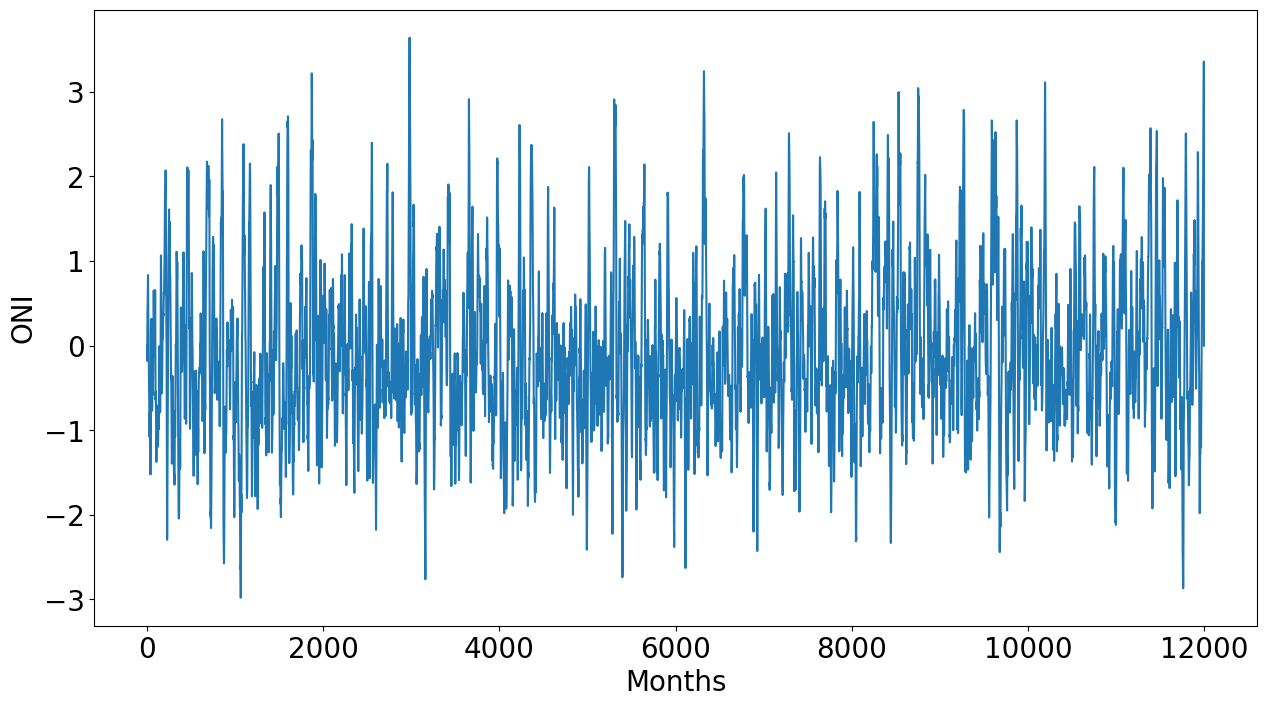

In [30]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(ONI_gan_3mo_avg.values.reshape(12000))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')

plt.xlabel('Months',fontsize=20)
plt.ylabel('ONI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/GISS/ONI_3ma_gan.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_247894/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_247894/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white


/tmp/ipykernel_247894/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_247894/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


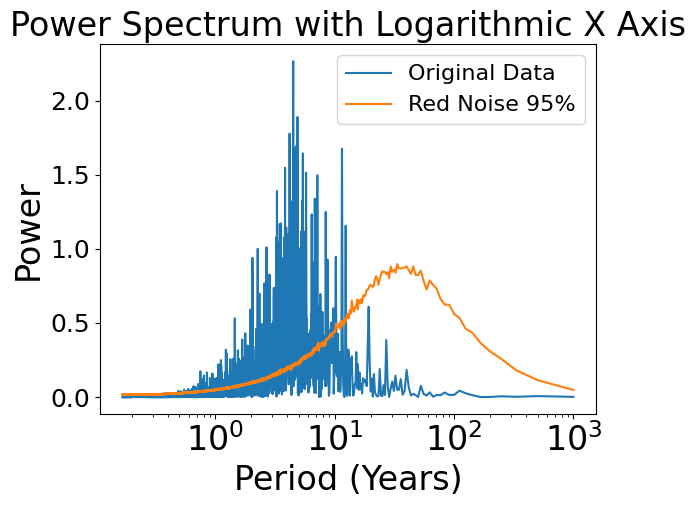

In [31]:
plot=cal_power_spect(ONI_gan_3mo_avg.values.reshape(12000))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/GISS/ONI_3ma_pow_spec_gan.png',dpi=300,bbox_inches='tight')
plt.show()

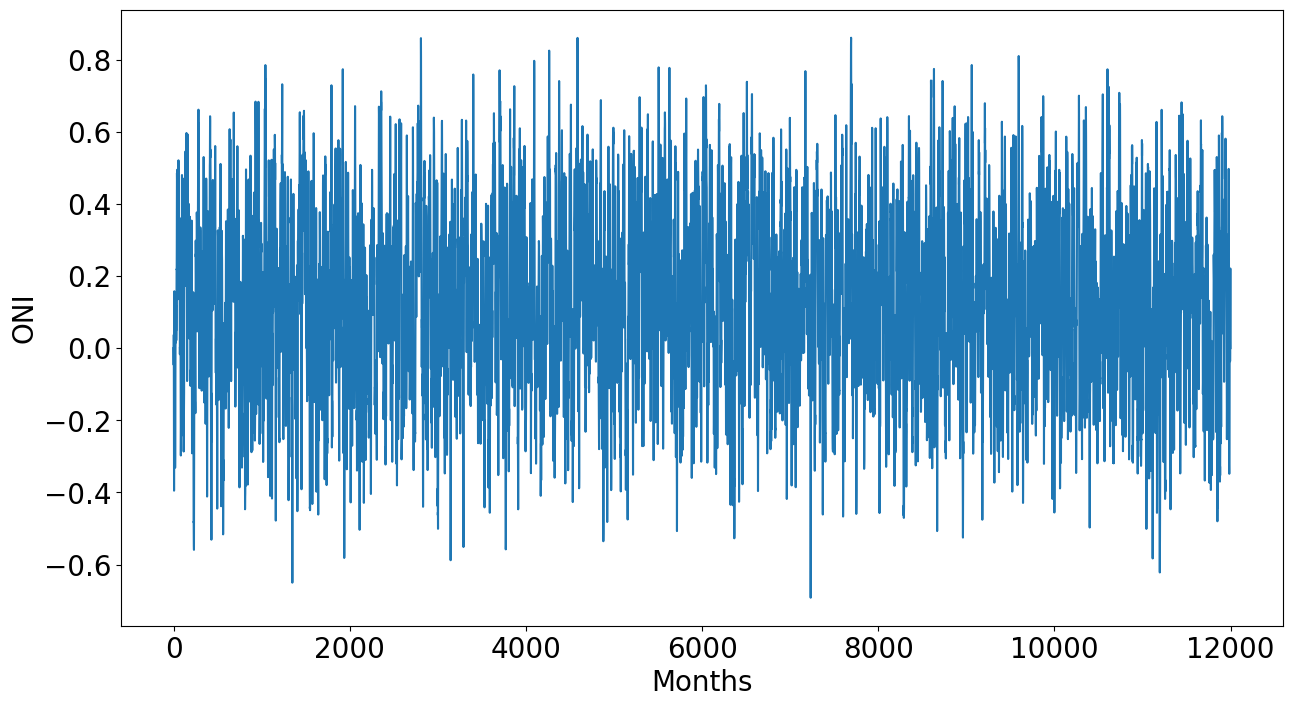

In [25]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(ONI_diffusion_3mo_avg.values.reshape(12000))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')

plt.xlabel('Months',fontsize=20)
plt.ylabel('ONI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/GISS/ONI_3ma_diffusion.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_781946/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_781946/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_781946/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_781946/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


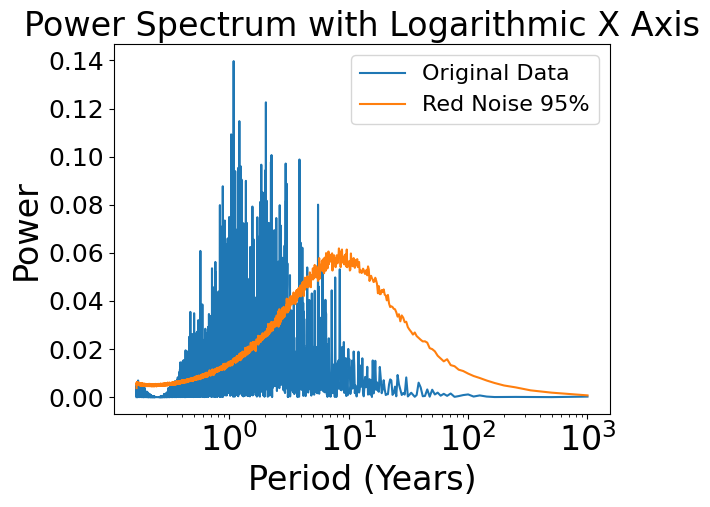

In [26]:
plot=cal_power_spect(ONI_diffusion_3mo_avg.values.reshape(12000))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/GISS/ONI_3ma_pow_spec_diffusion.png',dpi=300,bbox_inches='tight')
plt.show()

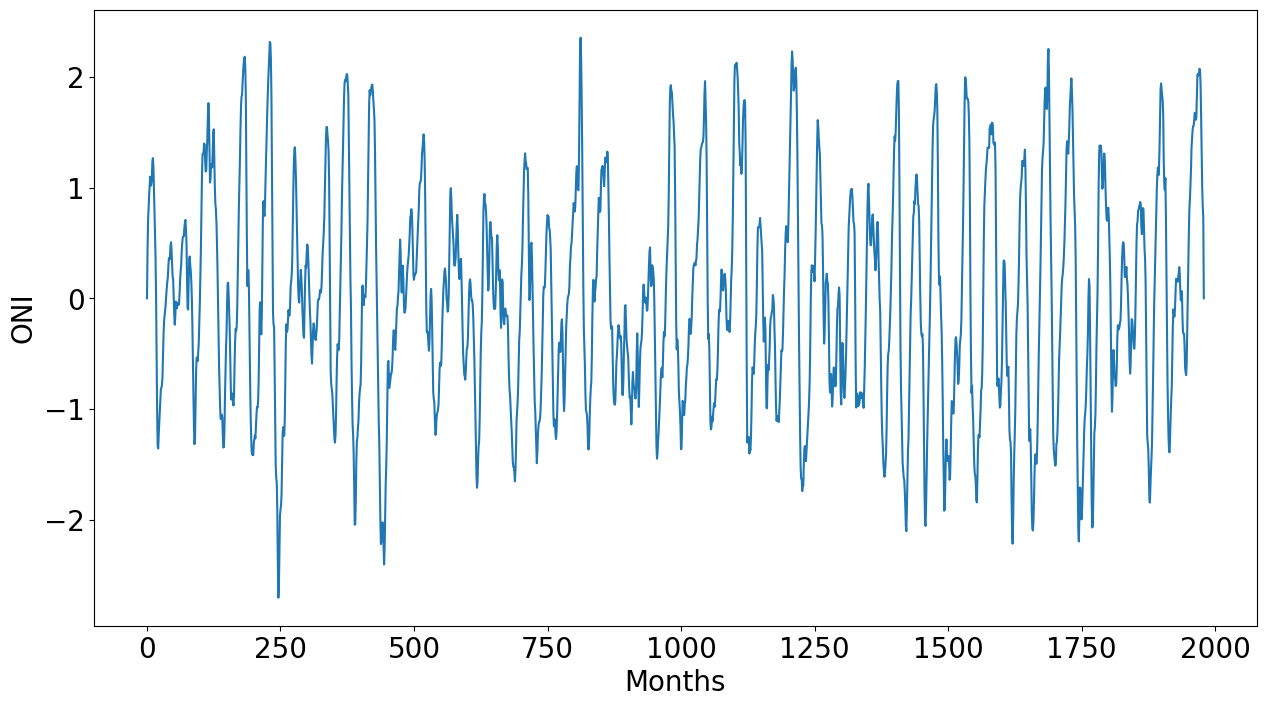

In [47]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(ONI_ori_3mo_avg.values.reshape(1980))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')

plt.xlabel('Months',fontsize=20)
plt.ylabel('ONI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/Paper_results/GISS/ONI_3ma_ori.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_2681/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_2681/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_2681/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_2681/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


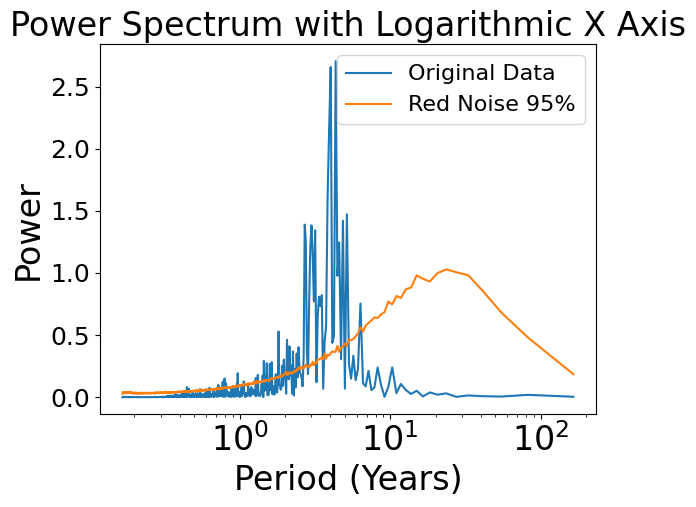

In [48]:
plot=cal_power_spect(ONI_ori_3mo_avg.values.reshape(1980))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/Paper_results/GISS/ONI_3ma_pow_spec_ori.png',dpi=300,bbox_inches='tight')
plt.show()

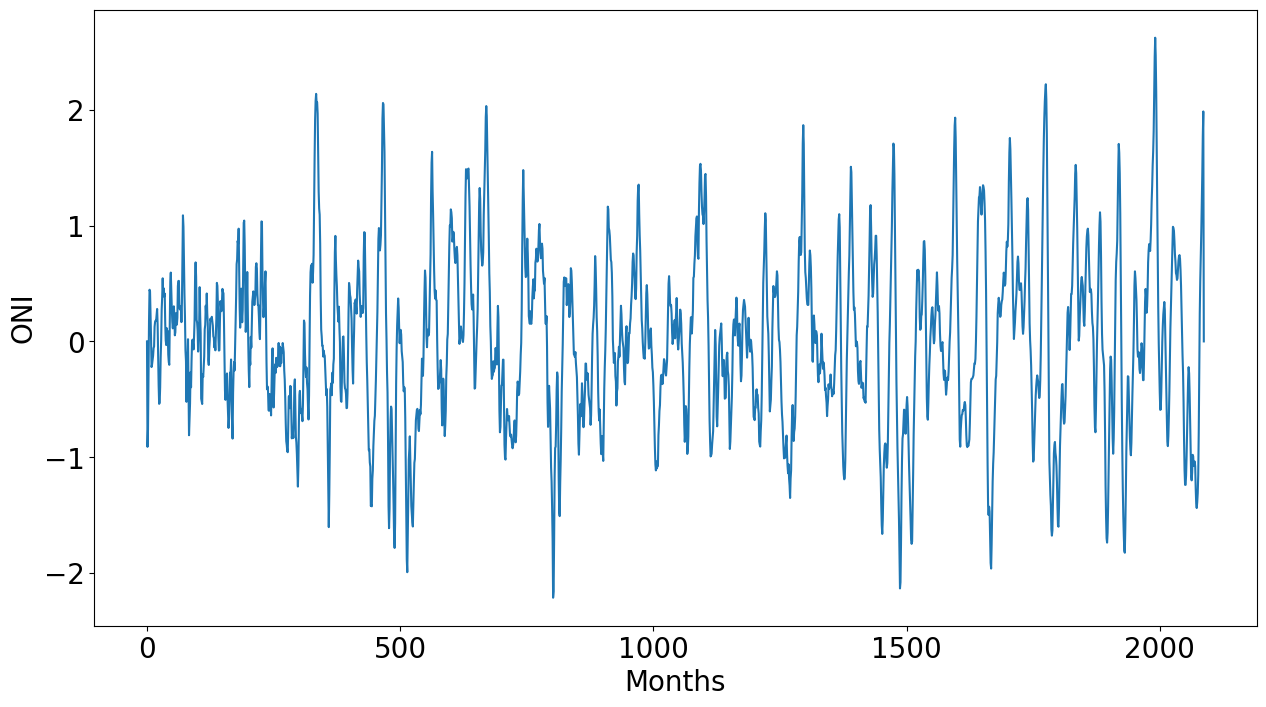

In [49]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(ONI_obs_3mo_avg.values.reshape(2088))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')

plt.xlabel('Months',fontsize=20)
plt.ylabel('ONI',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/Paper_results/GISS/ONI_3ma_obs.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_2681/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_2681/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_2681/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_2681/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


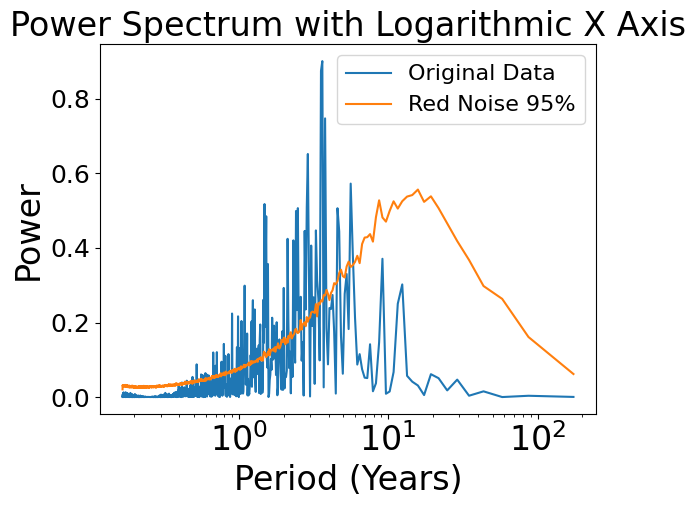

In [50]:
plot=cal_power_spect(ONI_obs_3mo_avg.values.reshape(2088))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/Paper_results/GISS/ONI_3ma_pow_spec_obs.png',dpi=300,bbox_inches='tight')
plt.show()

# IODM (Figure 10 a, b,c,d)

In [ ]:
IODM_gen=vae_anom_ds.sel(lat=slice(-10.0,10.0),lon=slice(50,70))['sst'].mean(['lat','lon'])-vae_anom_ds.sel(lat=slice(-10.0,0.0),lon=slice(90,110))['sst'].mean(['lat','lon'])
IODM_gan=gan_anom_ds.sel(lat=slice(-10.0,10.0),lon=slice(50,70))['sst'].mean(['lat','lon'])-gan_anom_ds.sel(lat=slice(-10.0,0.0),lon=slice(90,110))['sst'].mean(['lat','lon'])
IODM_ori=ori_anom_ds.sel(lat=slice(-10.0,10.0),lon=slice(50,70))['sst'].mean(['lat','lon'])-ori_anom_ds.sel(lat=slice(-10.0,0.0),lon=slice(90,110))['sst'].mean(['lat','lon'])
IODM_obs=obs_anom_ds.sel(lat=slice(-10.0,10.0),lon=slice(50,70))['sst'].mean(['lat','lon'])-obs_anom_ds.sel(lat=slice(-10.0,0.0),lon=slice(90,110))['sst'].mean(['lat','lon'])

In [ ]:
IODM_gen_3mo_avg = IODM_gen.rolling(time=3, center=True).mean().fillna(0)
IODM_gan_3mo_avg = IODM_gan.rolling(time=3, center=True).mean().fillna(0)
IODM_ori_3mo_avg = IODM_ori.rolling(time=3, center=True).mean().fillna(0)
IODM_obs_3mo_avg = IODM_obs.rolling(time=3, center=True).mean().fillna(0)

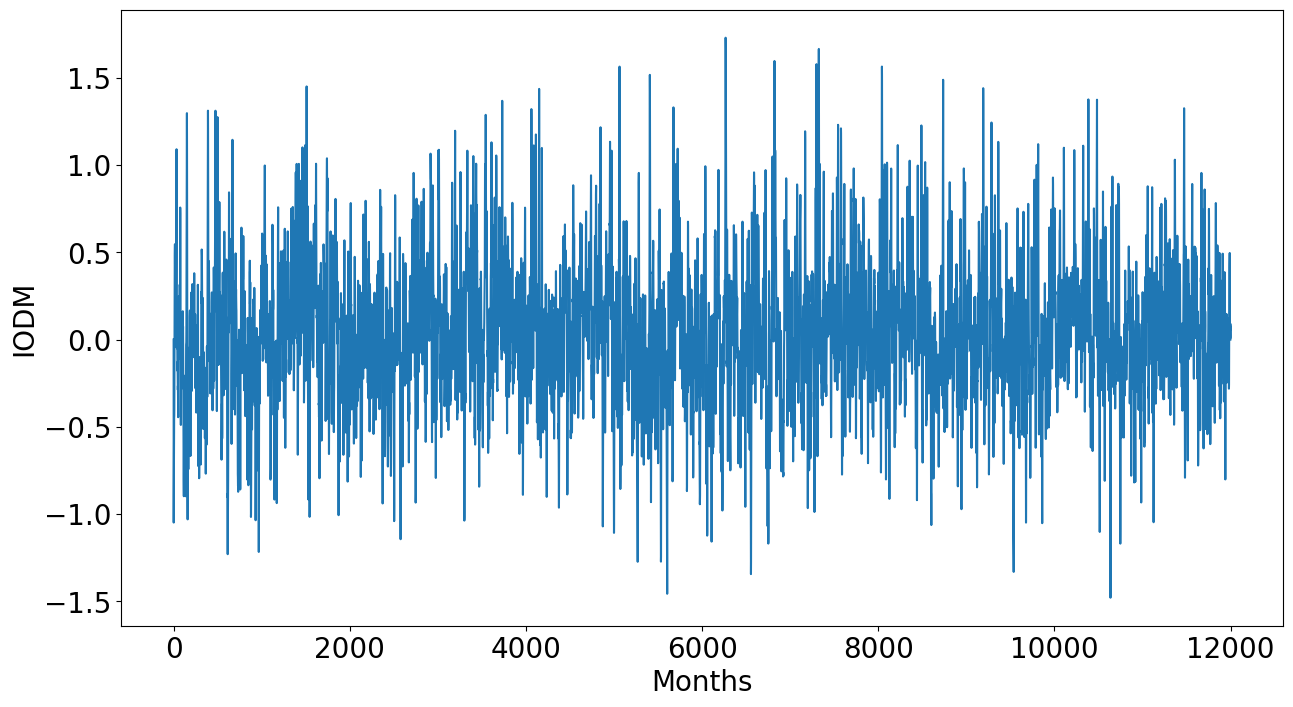

In [25]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(IODM_gen_3mo_avg.values.reshape(12000))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')

plt.xlabel('Months',fontsize=20)
plt.ylabel('IODM',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/Paper_results/EC_Earth3_CC/IODM_3ma_gen.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_61145/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_61145/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_61145/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_61145/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


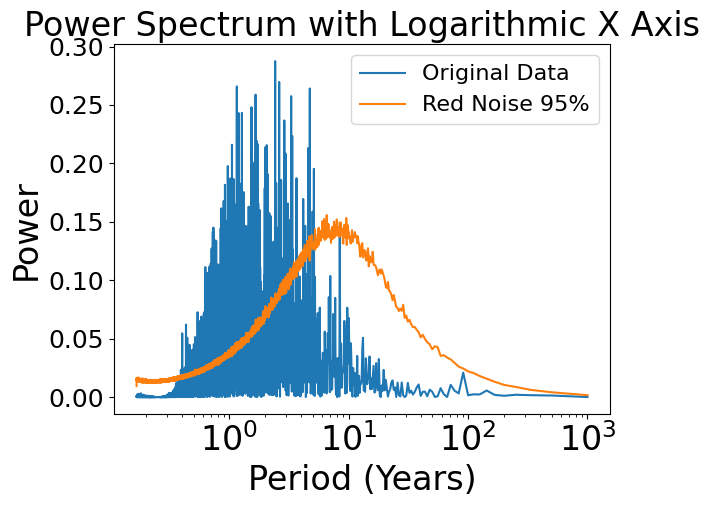

In [26]:
plot=cal_power_spect(IODM_gen_3mo_avg.values.reshape(12000))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/Paper_results/EC_Earth3_CC/IODM_3ma_pow_spec_gen.png',dpi=300,bbox_inches='tight')
plt.show()

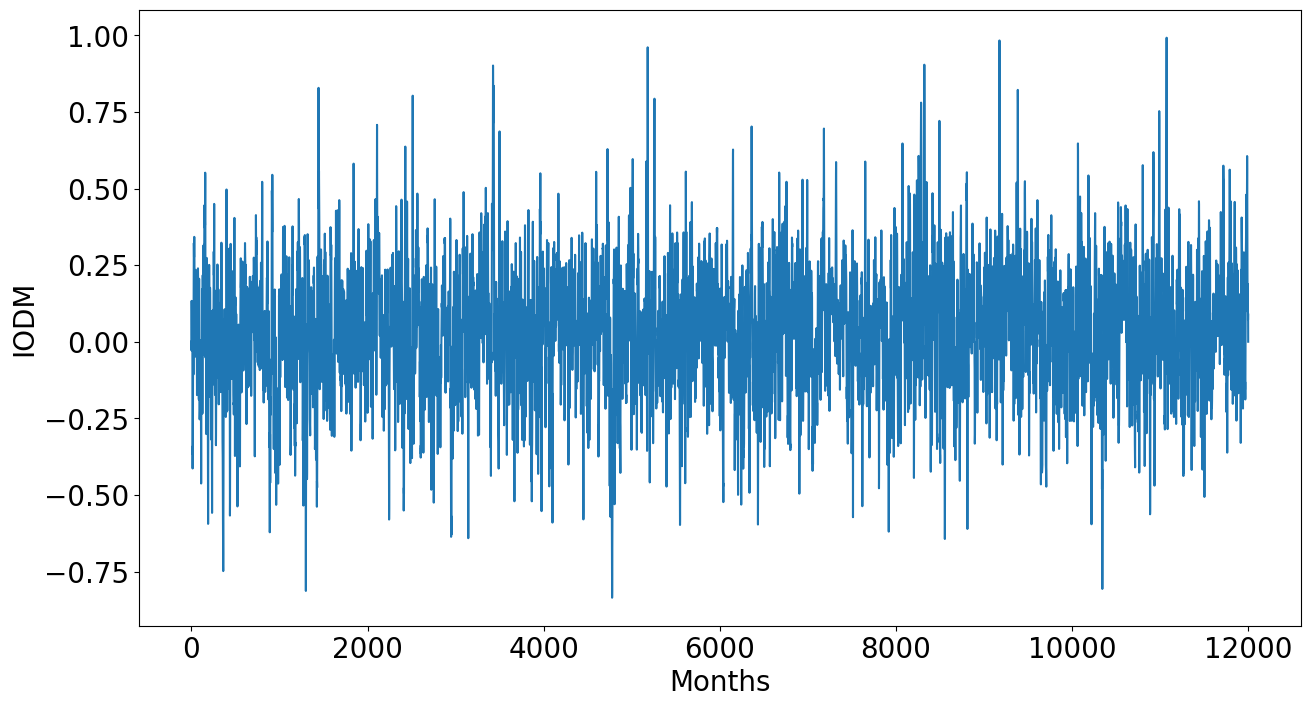

In [ ]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(IODM_gan_3mo_avg.values.reshape(12000))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')

plt.xlabel('Months',fontsize=20)
plt.ylabel('IODM',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/Paper_results/EC_Earth3_CC/IODM_3ma_gen_ft.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_61145/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_61145/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white


/tmp/ipykernel_61145/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_61145/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


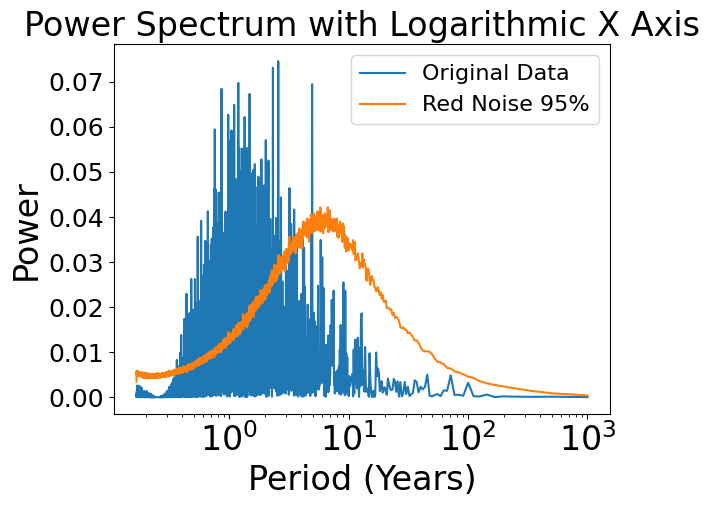

In [ ]:
plot=cal_power_spect(IODM_gan_3mo_avg.values.reshape(12000))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/Paper_results/EC_Earth3_CC/IODM_3ma_pow_spec_gen_ft.png',dpi=300,bbox_inches='tight')
plt.show()

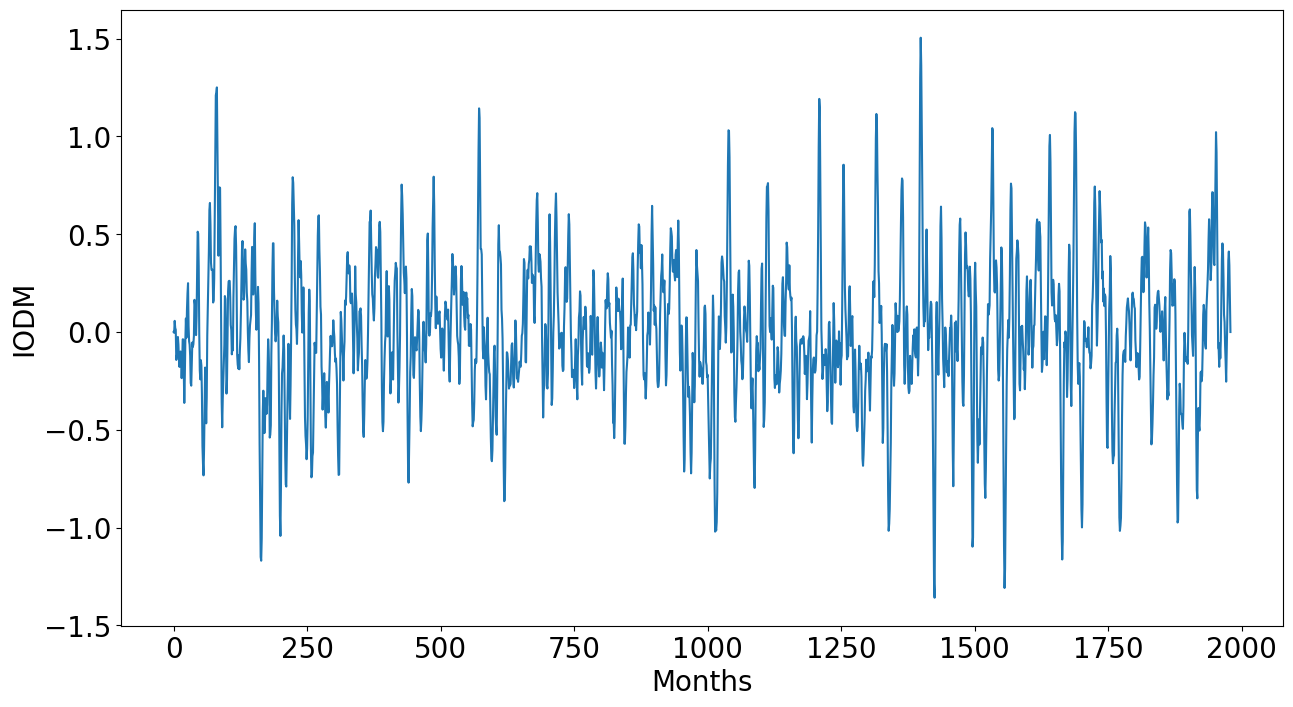

In [57]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(IODM_ori_3mo_avg.values.reshape(1980))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')

plt.xlabel('Months',fontsize=20)
plt.ylabel('IODM',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/Paper_results/GISS/IODM_3ma_ori.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_2681/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_2681/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_2681/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_2681/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


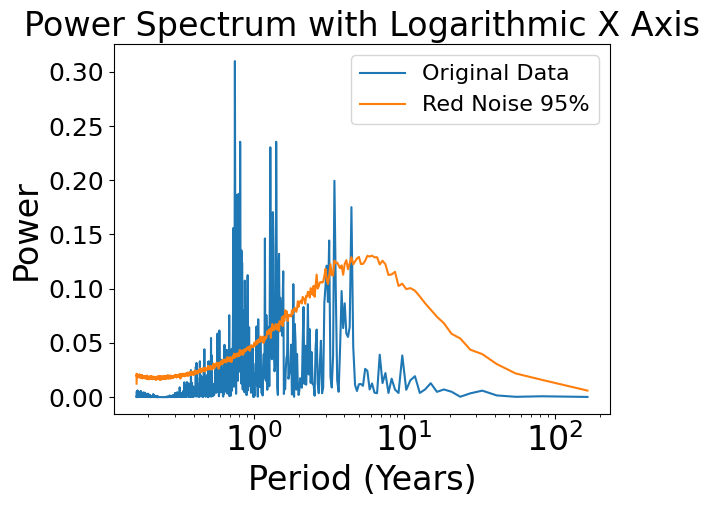

In [58]:
plot=cal_power_spect(IODM_ori_3mo_avg.values.reshape(1980))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/Paper_results/GISS/IODM_3ma_pow_spec_ori.png',dpi=300,bbox_inches='tight')
plt.show()

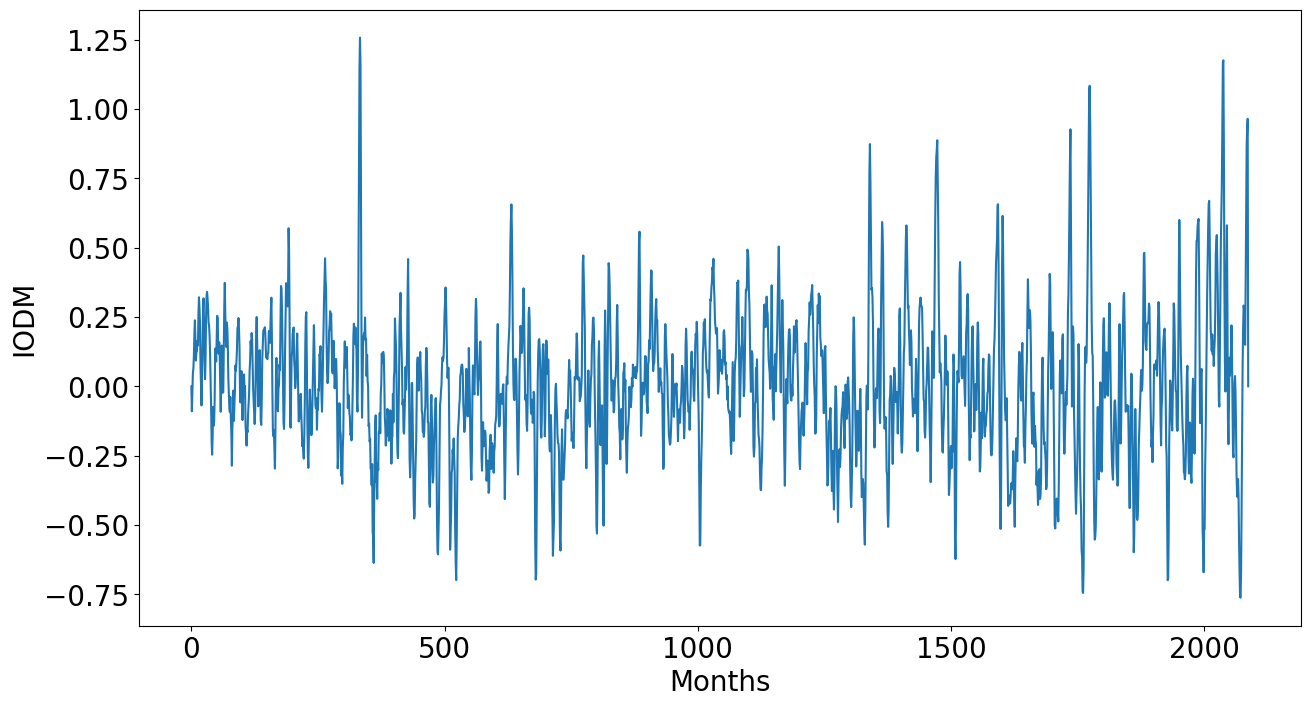

In [59]:
import pandas as pd

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(IODM_obs_3mo_avg.values.reshape(2088))

#plt.plot(ONI_ori.values.reshape(1980),label='GISS')

plt.xlabel('Months',fontsize=20)
plt.ylabel('IODM',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.legend()
#plt.title('ENSO Index')
plt.savefig('../Data/output/Paper_results/GISS/IODM_3ma_obs.png',dpi=300,bbox_inches='tight')
plt.show()

/tmp/ipykernel_2681/3630853429.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[0,i]=rho*rzero+white
/tmp/ipykernel_2681/3630853429.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red_sum[j,i]=rho*red_sum[j-1,i]+white
/tmp/ipykernel_2681/3630853429.py:99: RuntimeWarning: divide by zero encountered in divide
  period_Po=1/f
/tmp/ipykernel_2681/3630853429.py:100: RuntimeWarning: divide by zero encountered in divide
  period_Pr=1/fr


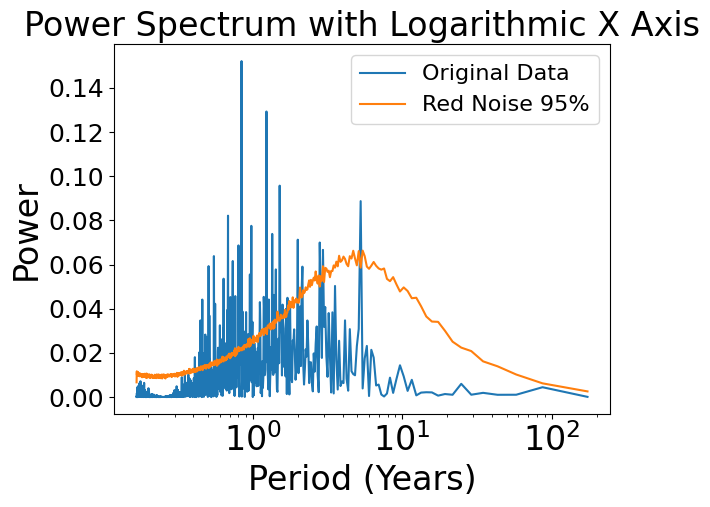

In [60]:
plot=cal_power_spect(IODM_obs_3mo_avg.values.reshape(2088))
plt.plot(plot[:, 0]/ 12, plot[:, 1], label='Original Data')
plt.plot(plot[:, 0]/ 12, plot[:, 2], label='Red Noise 95%')
plt.xscale('log')
plt.xticks(fontsize=24)
plt.yticks(fontsize=18)
plt.xlabel('Period (Years)', fontsize=24)
plt.ylabel('Power', fontsize=24)
plt.legend(fontsize=16)
plt.title('Power Spectrum with Logarithmic X Axis', fontsize=24)
plt.savefig('../Data/output/Paper_results/GISS/IODM_3ma_pow_spec_obs.png',dpi=300,bbox_inches='tight')
plt.show()